In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import xgboost as xgb
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, average_precision_score, roc_curve, auc, recall_score, precision_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris
from sklearn import datasets, metrics, model_selection, svm
from xgboost import plot_importance, XGBClassifier

Import the data

In [2]:
data = pd.read_csv(r'C:\Users\cboat\OneDrive\Documents\GitHub\Infield-Throws-Predicted\data.csv')
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
3             8        8         308                 1         308   
4            10        1         314                 4         300   
...         ...      ...         ...               ...         ...   
19995     33189        1         300                 6         187   
19996     33190        1         768                 7         768   
19997     33192        1          63                 3         300   
19998     33193       15         713                 4         713   
19999     33194       15         313                 4         313   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
3                     1          143                  3          1.800   
4                     6          514                  3          0.733   
...                 ...          ...                ...            ...   
19995                 4           63                  3          0.567   
19996                 7           63                  3          1.134   
19997                 6           63                  3          1.266   
19998                 4          313                  3          1.200   
19999                 4          159                  3          1.267   

       throw_pos_x  ...  bounce_velo_y  bounce_velo_z  receiver_pos_x  \
0       -60.116123  ...     -25.452504       7.330194       56.199323   
1        -0.562563  ...            NaN            NaN       59.013134   
2         1.598751  ...            NaN            NaN       61.037489   
3        25.403185  ...            NaN            NaN       63.142075   
4         8.957441  ...            NaN            NaN       59.770395   
...            ...  ...            ...            ...             ...   
19995    -0.706883  ...     -32.706535       8.013511       61.579339   
19996   -72.726998  ...     -30.850832      11.182392       60.859688   
19997     7.741671  ...            NaN            NaN       59.986376   
19998    65.300092  ...            NaN            NaN       60.946962   
19999    74.672144  ...            NaN            NaN       61.288824   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
0           60.187776               8.202015                            0   
1           65.657938               5.047566                            0   
2           64.429134               2.719261                            0   
3           65.648720               2.069797                            0   
4           64.046058               3.890504                            0   
...               ...                    ...                          ...   
19995       66.498556               3.523959                            0   
19996       61.483396               3.518128                            0   
19997       65.275522               4.002790                            0   
19998       64.565955               2.847538                            0   
19999       65.279685               2.866364                            0   

       start_state  end_state  runs_on_play  batter_result  
0            ____1      1___1             0          first  
1            1___1      1___2             0          first  
2            123_1      ____3             0            out  
3            ____1      ____2             0            out  
4            123_1      ____3             0            out  
...            ...        ...           ...            ...  
19995        123_1      1_3_2             1     

Inspect the data to understand what it contains.

In [3]:
data.dtypes

throw_id                         int64
team_id                          int64
fielder_id                       int64
fielder_position                 int64
thrower_id                       int64
thrower_position                 int64
receiver_id                      int64
receiver_position                int64
exchange_time                  float64
throw_pos_x                    float64
throw_pos_y                    float64
throw_velo_x                   float64
throw_velo_y                   float64
throw_velo_z                   float64
batter_pos_x_at_throw          float64
batter_pos_y_at_throw          float64
batter_velo_at_throw           float64
bounce_pos_x                   float64
bounce_pos_y                   float64
bounce_velo_x                  float64
bounce_velo_y                  float64
bounce_velo_z                  float64
receiver_pos_x                 float64
receiver_pos_y                 float64
receiver_dist_from_1b          float64
throw_deflected_by_receiv

In [4]:
data.describe()

throw_id       team_id    fielder_id  fielder_position  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   16602.811600      8.006000    409.564400          4.885100   
std     9606.155157      4.336347    235.519526          1.639857   
min        3.000000      1.000000      1.000000          1.000000   
25%     8291.500000      4.000000    201.000000          4.000000   
50%    16555.500000      8.000000    394.000000          5.000000   
75%    24901.250000     12.000000    622.000000          6.000000   
max    33194.000000     15.000000    846.000000          9.000000   

         thrower_id  thrower_position   receiver_id  receiver_position  \
count  20000.000000      20000.000000  20000.000000            20000.0   
mean     407.302100          4.831050    446.469200                3.0   
std      236.197882          1.579883    260.051718                0.0   
min        1.000000          1.000000     13.000000                3.0   
25%      201.000000          4.000000    194.000000                3.0   
50%      391.000000          5.000000    534.000000                3.0   
75%      622.000000          6.000000    615.000000                3.0   
max      847.000000          9.000000    863.000000                3.0   

       exchange_time   throw_pos_x  ...  bounce_pos_x  bounce_pos_y  \
count   19993.000000  19987.000000  ...   1891.000000   1891.000000   
mean        1.152051     -3.468916  ...     42.334492     80.533757   
std         0.518481     47.011863  ...     22.287096     19.173361   
min         0.000000   -214.106291  ...    -87.215484     -1.130720   
25%         0.767000    -38.708315  ...     31.314975     69.338822   
50%         1.133000     -3.669111  ...     47.041717     75.286643   
75%         1.434000     25.505990  ...     53.801463     86.965698   
max         7.367000    225.873189  ...    131.297001    208.110588   

       bounce_velo_x  bounce_velo_y  bounce_velo_z  receiver_pos_x  \
count    1891.000000    1891.000000    1891.000000    19968.000000   
mean       23.838444     -22.774238       8.963900       59.332898   
std        22.880595      14.542289       2.142547       10.797400   
min       -43.103385     -60.945206      -0.900142      -61.082994   
25%        11.400142     -32.706903       7.569747       60.058868   
50%        30.961474     -23.531674       8.881996       60.874737   
75%        40.600469     -13.620749      10.190943       61.670060   
max        63.304051      41.457148      22.303787      171.003787   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
count    19968.000000           19968.000000                  20000.00000   
mean        65.084216               5.935529                      0.02205   
std          6.257555              11.880415                      0.14685   
min        -14.281589               0.037121                      0.00000   
25%         63.760289               2.588224                      0.00000   
50%         64.517151               3.202949                      0.00000   
75%         65.481720               3.928205                      0.00000   
max        178.908836             135.961657                      1.00000   

       runs_on_play  
count  20000.000000  
mean       0.053050  
std        0.246452  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000  

[8 rows x 27 columns]

Check if there are any NA values and where they are. Most of the NA values are found in the columns that determine if the throw bounced on it's way to first. This is the same as it was in the query section but I took a different approach here. I created a binary column showing if the throw bounced or not. If the value was NULL it received a 0 and if it wasn't a 1. Therefore if the throw didn't bounce, then 0, if it did, then 1. I then decided to remove the columns all together because I now have a column to identify if the throw bounced. I then simply removed the rest of the NA values as they don't resemble a large portion of the data. 

In [5]:
data.isna().sum()

throw_id                           0
team_id                            0
fielder_id                         0
fielder_position                   0
thrower_id                         0
thrower_position                   0
receiver_id                        0
receiver_position                  0
exchange_time                      7
throw_pos_x                       13
throw_pos_y                       13
throw_velo_x                      12
throw_velo_y                      12
throw_velo_z                      12
batter_pos_x_at_throw             30
batter_pos_y_at_throw             30
batter_velo_at_throw              30
bounce_pos_x                   18109
bounce_pos_y                   18109
bounce_velo_x                  18109
bounce_velo_y                  18109
bounce_velo_z                  18109
receiver_pos_x                    32
receiver_pos_y                    32
receiver_dist_from_1b             32
throw_deflected_by_receiver        0
start_state                        0
e

In [6]:
data['bounced_throw'] = np.where(data['bounce_pos_x'].isnull(), 0, 1)
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
3             8        8         308                 1         308   
4            10        1         314                 4         300   
...         ...      ...         ...               ...         ...   
19995     33189        1         300                 6         187   
19996     33190        1         768                 7         768   
19997     33192        1          63                 3         300   
19998     33193       15         713                 4         713   
19999     33194       15         313                 4         313   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
3                     1          143                  3          1.800   
4                     6          514                  3          0.733   
...                 ...          ...                ...            ...   
19995                 4           63                  3          0.567   
19996                 7           63                  3          1.134   
19997                 6           63                  3          1.266   
19998                 4          313                  3          1.200   
19999                 4          159                  3          1.267   

       throw_pos_x  ...  bounce_velo_z  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...       7.330194       56.199323       60.187776   
1        -0.562563  ...            NaN       59.013134       65.657938   
2         1.598751  ...            NaN       61.037489       64.429134   
3        25.403185  ...            NaN       63.142075       65.648720   
4         8.957441  ...            NaN       59.770395       64.046058   
...            ...  ...            ...             ...             ...   
19995    -0.706883  ...       8.013511       61.579339       66.498556   
19996   -72.726998  ...      11.182392       60.859688       61.483396   
19997     7.741671  ...            NaN       59.986376       65.275522   
19998    65.300092  ...            NaN       60.946962       64.565955   
19999    74.672144  ...            NaN       61.288824       65.279685   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
3                   2.069797                            0        ____1   
4                   3.890504                            0        123_1   
...                      ...                          ...          ...   
19995               3.523959                            0        123_1   
19996               3.518128                            0        1___0   
19997               4.002790                            0        1___1   
19998               2.847538                            0        ____2   
19999               2.866364                            0        ____0   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
3          ____2             0            out              0  
4          ____3             0            out              0  
...          ...           ...            ...            ...  
19995      1_3_2             1          first             

In [7]:
columns_to_remove = ['bounce_pos_x', 'bounce_pos_y', 'bounce_velo_x', 'bounce_velo_y', 'bounce_velo_z']
data = data.drop(columns=columns_to_remove)
data = data.dropna()

data.isna().sum()

throw_id                       0
team_id                        0
fielder_id                     0
fielder_position               0
thrower_id                     0
thrower_position               0
receiver_id                    0
receiver_position              0
exchange_time                  0
throw_pos_x                    0
throw_pos_y                    0
throw_velo_x                   0
throw_velo_y                   0
throw_velo_z                   0
batter_pos_x_at_throw          0
batter_pos_y_at_throw          0
batter_velo_at_throw           0
receiver_pos_x                 0
receiver_pos_y                 0
receiver_dist_from_1b          0
throw_deflected_by_receiver    0
start_state                    0
end_state                      0
runs_on_play                   0
batter_result                  0
bounced_throw                  0
dtype: int64

I checked the length of the data set and observed the unique values within some of the columns to understand it better. All throws were to first base and the goal is to determine infield throws. I only kept the throws from second, short and third because those are the players that are considered infielders that would throw the ball to first base.

In [8]:
len(data)

19925

In [9]:
print(data['receiver_position'].unique())
print(data['thrower_position'].unique())
print(data['fielder_position'].unique())
print(data['batter_result'].unique())
print(data['runs_on_play'].unique())

[3]
[6 4 1 5 9 8 2 7]
[6 5 4 1 3 9 8 2 7]
['first' 'out' 'second' 'third']
[0 1 2 3]


In [10]:
data = data[(data['thrower_position'] >= 4) & (data['thrower_position'] <= 6)]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
4            10        1         314                 4         300   
5            11        2         312                 4         312   
...         ...      ...         ...               ...         ...   
19994     33188        1         507                 5         507   
19995     33189        1         300                 6         187   
19997     33192        1          63                 3         300   
19998     33193       15         713                 4         713   
19999     33194       15         313                 4         313   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
4                     6          514                  3          0.733   
5                     4          695                  3          1.200   
...                 ...          ...                ...            ...   
19994                 5           63                  3          0.933   
19995                 4           63                  3          0.567   
19997                 6           63                  3          1.266   
19998                 4          313                  3          1.200   
19999                 4          159                  3          1.267   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...             25.787532       56.199323       60.187776   
1        -0.562563  ...             28.647878       59.013134       65.657938   
2         1.598751  ...             25.130428       61.037489       64.429134   
4         8.957441  ...             27.318509       59.770395       64.046058   
5        15.075073  ...             27.578044       59.622860       63.940860   
...            ...  ...                   ...             ...             ...   
19994   -21.462272  ...             28.284878       60.758995       63.767877   
19995    -0.706883  ...             27.057959       61.579339       66.498556   
19997     7.741671  ...             20.951101       59.986376       65.275522   
19998    65.300092  ...             19.628322       60.946962       64.565955   
19999    74.672144  ...             27.985441       61.288824       65.279685   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
4                   3.890504                            0        123_1   
5                   4.028031                            0        ____0   
...                      ...                          ...          ...   
19994               2.883469                            0        1_3_2   
19995               3.523959                            0        123_1   
19997               4.002790                            0        1___1   
19998               2.847538                            0        ____2   
19999               2.866364                            0        ____0   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
4          ____3             0            out              0  
5          ____1             0            out              0  
...          ...           ...       

I created a box plot to view the outliers within the 'exchange_time'. Taking the ball out of your glove with no time elapsing at all is impossible so I'm surprised to see that there is data showing an exchange time of 0 seconds. This seemed odd so I kept only the records that have an exchange time higher than 0.0 seconds.

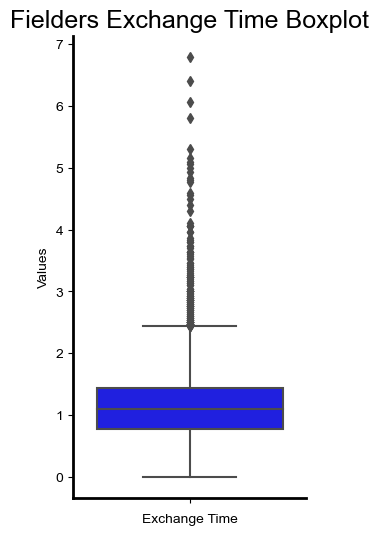

In [11]:
plt.figure(figsize=(3, 6)) 
boxplot = sns.boxplot(data=data, y='exchange_time', color = 'blue')

sns.set(font_scale=1.5)
plt.xlabel('Exchange Time')
plt.ylabel('Values')
plt.title('Fielders Exchange Time Boxplot')

sns.despine()

boxplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.show()

In [12]:
q1 = data['exchange_time'].quantile(0.25)
q3 = data['exchange_time'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['exchange_time'] < lower_bound) | (data['exchange_time'] > upper_bound)]
outliers                                                                  

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
160         255        3         842                 9          16   
163         260        6         516                 9         385   
371         592        5         565                 5         565   
482         793       13         749                 6         749   
569         921       15         178                 8         313   
...         ...      ...         ...               ...         ...   
19759     32831       12         399                 5         314   
19761     32833       12         703                 8         337   
19784     32871       14         662                 7         246   
19845     32957        1         187                 4         187   
19963     33136       10          37                 9         715   

       thrower_position  receiver_id  receiver_position  exchange_time  \
160                   4          816                  3          2.934   
163                   4          103                  3          2.867   
371                   5          766                  3          4.833   
482                   6          408                  3          3.634   
569                   4          568                  3          2.434   
...                 ...          ...                ...            ...   
19759                 4          536                  3          6.400   
19761                 6          536                  3          3.534   
19784                 6          534                  3          2.700   
19845                 4          514                  3          2.733   
19963                 6           50                  3          3.266   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
160      16.277043  ...              1.775727       13.600096       66.398744   
163      83.739993  ...              0.161790       42.208244       59.421917   
371     -53.229343  ...              8.661732      -13.152069       67.685358   
482      13.932691  ...              6.221070       60.839702       58.902392   
569       8.425847  ...              3.550682        1.920732       68.760216   
...            ...  ...                   ...             ...             ...   
19759   142.217314  ...              0.961521       58.335339       71.790128   
19761    -3.163986  ...              0.337939        7.517320       68.168935   
19784   -69.067899  ...              1.344958      -13.744079       88.344729   
19845     0.733299  ...             17.174256       61.449525       64.140283   
19963     1.866141  ...              3.299723        1.555168      124.504020   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
160                50.115524                            0        12__2   
163                21.842445                            0        1___1   
371                76.898180                            0        12__2   
482                 5.502792                            0        1___2   
569                61.930934                            0        _2__1   
...                      ...                          ...          ...   
19759               9.724517                            0        ____0   
19761              56.304762                            0        _2__1   
19784              81.231633                            0        123_1   
19845               2.246585                            0        _2__1   
19963              86.942247                            0        ____2   

       end_state  runs_on_play  batter_result  bounced_throw  
160        1_3_2             1          first              0  
163        _23_1             0         second              0  
371        ____3             0            out              0  
482        ____3             0            out              0  
569        1_3_1             0          first              0  
...          ...           ...       

In [13]:
data = data[data['exchange_time'] > 0.0]
data = data[~data.index.isin(outliers.index)]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
4            10        1         314                 4         300   
5            11        2         312                 4         312   
...         ...      ...         ...               ...         ...   
19994     33188        1         507                 5         507   
19995     33189        1         300                 6         187   
19997     33192        1          63                 3         300   
19998     33193       15         713                 4         713   
19999     33194       15         313                 4         313   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
4                     6          514                  3          0.733   
5                     4          695                  3          1.200   
...                 ...          ...                ...            ...   
19994                 5           63                  3          0.933   
19995                 4           63                  3          0.567   
19997                 6           63                  3          1.266   
19998                 4          313                  3          1.200   
19999                 4          159                  3          1.267   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...             25.787532       56.199323       60.187776   
1        -0.562563  ...             28.647878       59.013134       65.657938   
2         1.598751  ...             25.130428       61.037489       64.429134   
4         8.957441  ...             27.318509       59.770395       64.046058   
5        15.075073  ...             27.578044       59.622860       63.940860   
...            ...  ...                   ...             ...             ...   
19994   -21.462272  ...             28.284878       60.758995       63.767877   
19995    -0.706883  ...             27.057959       61.579339       66.498556   
19997     7.741671  ...             20.951101       59.986376       65.275522   
19998    65.300092  ...             19.628322       60.946962       64.565955   
19999    74.672144  ...             27.985441       61.288824       65.279685   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
4                   3.890504                            0        123_1   
5                   4.028031                            0        ____0   
...                      ...                          ...          ...   
19994               2.883469                            0        1_3_2   
19995               3.523959                            0        123_1   
19997               4.002790                            0        1___1   
19998               2.847538                            0        ____2   
19999               2.866364                            0        ____0   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
4          ____3             0            out              0  
5          ____1             0            out              0  
...          ...           ...       

I created a box plot to visualize the interquartile ranges of various numeric values. This gave me more of an understanding of the data within the columns and where most of the outliers are.

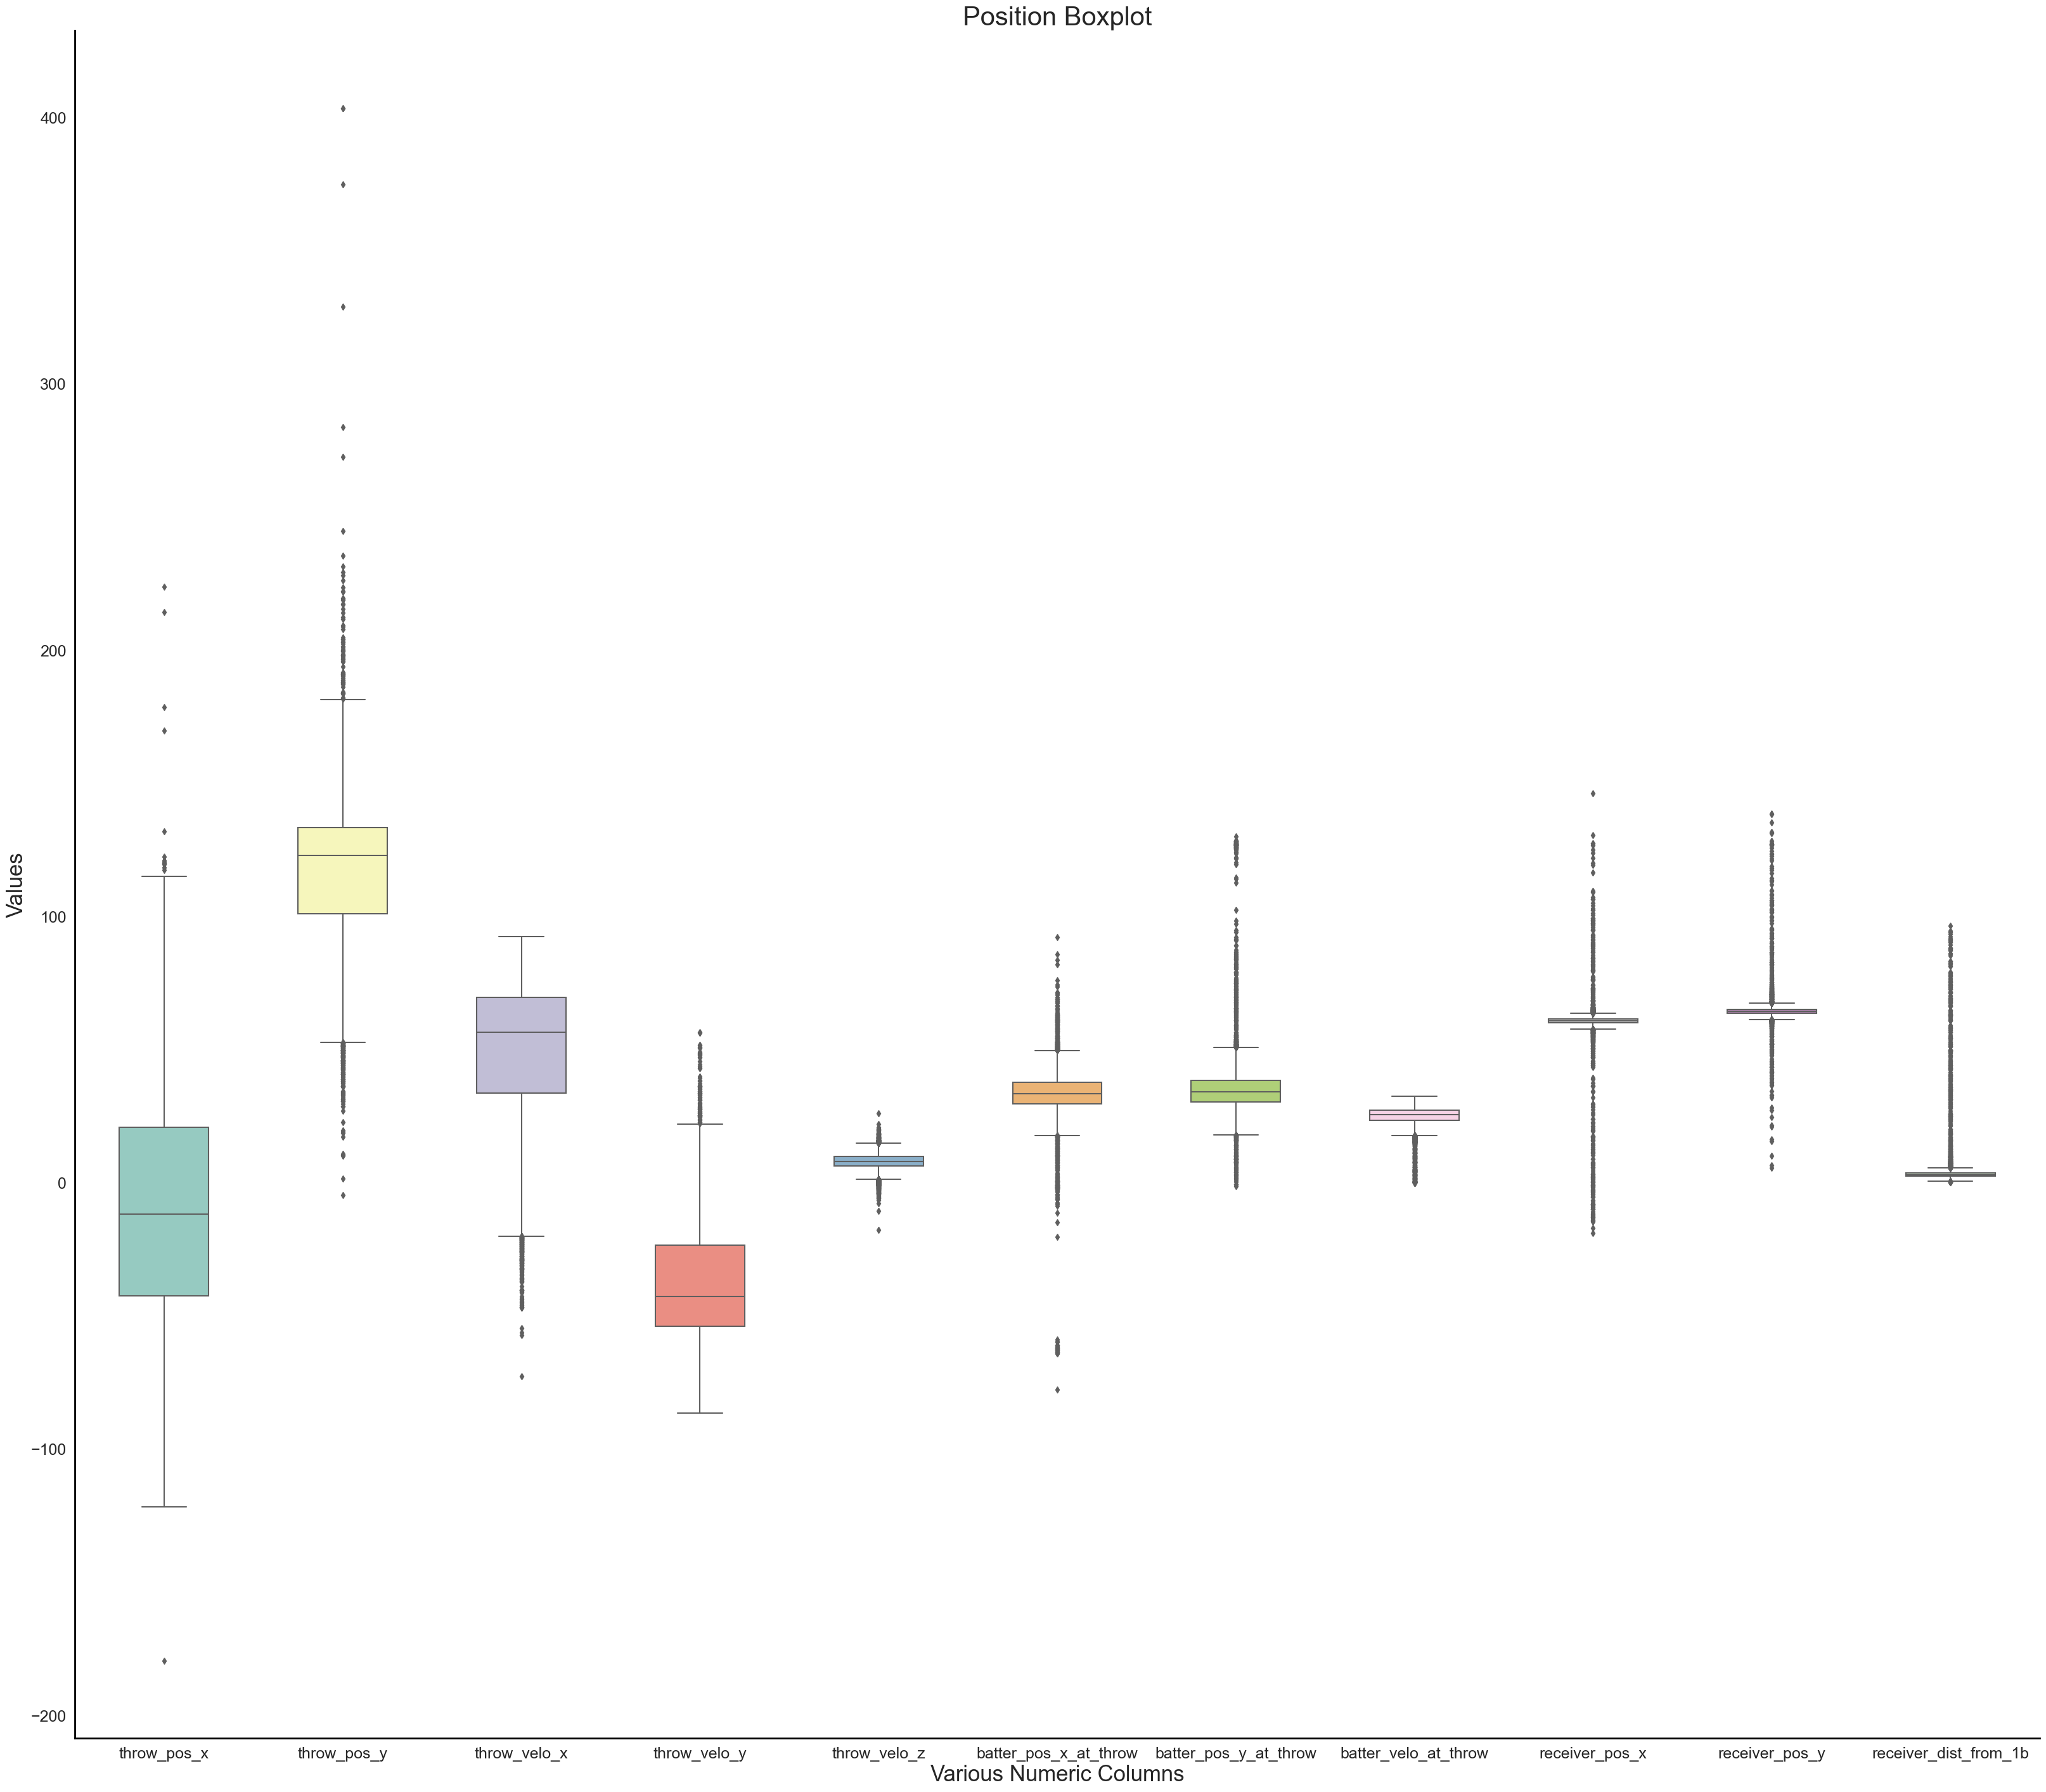

In [14]:
plt.figure(figsize=(40, 35)) 
boxplot = sns.boxplot(data=data[['throw_pos_x', 'throw_pos_y', 'throw_velo_x', 'throw_velo_y', 'throw_velo_z',
                                 'batter_pos_x_at_throw', 'batter_pos_y_at_throw', 'batter_velo_at_throw',
                                 'receiver_pos_x', 'receiver_pos_y', 'receiver_dist_from_1b']], palette="Set3", width=0.5)

sns.set(font_scale=1.5) 
plt.xlabel('Various Numeric Columns', fontsize=25)  
plt.ylabel('Values', fontsize=25)  
plt.title('Position Boxplot', fontsize=30)


plt.tick_params(axis='both', which='both', labelsize=18)


sns.despine()

boxplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.show()

I removed bad data based on various values within columns. I don't think most players will be making throws from 30 feet behind first base or further than 220 feet in the outfield. I also don't see how negative velocities are possible and how a 1B can receive a ball that is more than 10 feet off the base. Anything further would be air mailed.

In [15]:
data = data[(data['throw_pos_x'] <= 120)]
data = data[(data['throw_pos_y'] <= 220)]
data = data[(data['throw_velo_x'] > 0)]
data = data[data['receiver_dist_from_1b'] <= 10]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
4            10        1         314                 4         300   
5            11        2         312                 4         312   
...         ...      ...         ...               ...         ...   
19992     33186       15         713                 4         713   
19993     33187        1         300                 6         300   
19994     33188        1         507                 5         507   
19995     33189        1         300                 6         187   
19997     33192        1          63                 3         300   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
4                     6          514                  3          0.733   
5                     4          695                  3          1.200   
...                 ...          ...                ...            ...   
19992                 4          313                  3          1.267   
19993                 6           63                  3          1.033   
19994                 5           63                  3          0.933   
19995                 4           63                  3          0.567   
19997                 6           63                  3          1.266   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...             25.787532       56.199323       60.187776   
1        -0.562563  ...             28.647878       59.013134       65.657938   
2         1.598751  ...             25.130428       61.037489       64.429134   
4         8.957441  ...             27.318509       59.770395       64.046058   
5        15.075073  ...             27.578044       59.622860       63.940860   
...            ...  ...                   ...             ...             ...   
19992    41.864597  ...             23.665143       61.337746       64.227028   
19993   -10.456172  ...             19.838995       60.756393       63.292881   
19994   -21.462272  ...             28.284878       60.758995       63.767877   
19995    -0.706883  ...             27.057959       61.579339       66.498556   
19997     7.741671  ...             20.951101       59.986376       65.275522   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
4                   3.890504                            0        123_1   
5                   4.028031                            0        ____0   
...                      ...                          ...          ...   
19992               2.375634                            0        ____0   
19993               2.903991                            0        ____1   
19994               2.883469                            0        1_3_2   
19995               3.523959                            0        123_1   
19997               4.002790                            0        1___1   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
4          ____3             0            out              0  
5          ____1             0            out              0  
...          ...           ...       

To gain a better understanding of the remaining data, I viewed the IQR's of the x and y values of where the batters are when the throw is made. I also created another box plot using the same columns. The data does look cleaner and more realistic now.

In [16]:
q1 = data['batter_pos_x_at_throw'].quantile(0.25)
q3 = data['batter_pos_x_at_throw'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['batter_pos_x_at_throw'] < lower_bound) | (data['batter_pos_x_at_throw'] > upper_bound)]
data = data[~data.index.isin(outliers.index)]
data                                                                  

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
4            10        1         314                 4         300   
5            11        2         312                 4         312   
...         ...      ...         ...               ...         ...   
19992     33186       15         713                 4         713   
19993     33187        1         300                 6         300   
19994     33188        1         507                 5         507   
19995     33189        1         300                 6         187   
19997     33192        1          63                 3         300   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
4                     6          514                  3          0.733   
5                     4          695                  3          1.200   
...                 ...          ...                ...            ...   
19992                 4          313                  3          1.267   
19993                 6           63                  3          1.033   
19994                 5           63                  3          0.933   
19995                 4           63                  3          0.567   
19997                 6           63                  3          1.266   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...             25.787532       56.199323       60.187776   
1        -0.562563  ...             28.647878       59.013134       65.657938   
2         1.598751  ...             25.130428       61.037489       64.429134   
4         8.957441  ...             27.318509       59.770395       64.046058   
5        15.075073  ...             27.578044       59.622860       63.940860   
...            ...  ...                   ...             ...             ...   
19992    41.864597  ...             23.665143       61.337746       64.227028   
19993   -10.456172  ...             19.838995       60.756393       63.292881   
19994   -21.462272  ...             28.284878       60.758995       63.767877   
19995    -0.706883  ...             27.057959       61.579339       66.498556   
19997     7.741671  ...             20.951101       59.986376       65.275522   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
4                   3.890504                            0        123_1   
5                   4.028031                            0        ____0   
...                      ...                          ...          ...   
19992               2.375634                            0        ____0   
19993               2.903991                            0        ____1   
19994               2.883469                            0        1_3_2   
19995               3.523959                            0        123_1   
19997               4.002790                            0        1___1   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
4          ____3             0            out              0  
5          ____1             0            out              0  
...          ...           ...       

In [17]:
q1 = data['batter_pos_y_at_throw'].quantile(0.25)
q3 = data['batter_pos_y_at_throw'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['batter_pos_y_at_throw'] < lower_bound) | (data['batter_pos_y_at_throw'] > upper_bound)]
data = data[~data.index.isin(outliers.index)]
data                                                                

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
0             3       11         400                 6         400   
1             6       11         228                 5         390   
2             7        8         415                 4         415   
4            10        1         314                 4         300   
5            11        2         312                 4         312   
...         ...      ...         ...               ...         ...   
19992     33186       15         713                 4         713   
19993     33187        1         300                 6         300   
19994     33188        1         507                 5         507   
19995     33189        1         300                 6         187   
19997     33192        1          63                 3         300   

       thrower_position  receiver_id  receiver_position  exchange_time  \
0                     6           63                  3          1.533   
1                     4           63                  3          0.534   
2                     4          143                  3          1.266   
4                     6          514                  3          0.733   
5                     4          695                  3          1.200   
...                 ...          ...                ...            ...   
19992                 4          313                  3          1.267   
19993                 6           63                  3          1.033   
19994                 5           63                  3          0.933   
19995                 4           63                  3          0.567   
19997                 6           63                  3          1.266   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
0       -60.116123  ...             25.787532       56.199323       60.187776   
1        -0.562563  ...             28.647878       59.013134       65.657938   
2         1.598751  ...             25.130428       61.037489       64.429134   
4         8.957441  ...             27.318509       59.770395       64.046058   
5        15.075073  ...             27.578044       59.622860       63.940860   
...            ...  ...                   ...             ...             ...   
19992    41.864597  ...             23.665143       61.337746       64.227028   
19993   -10.456172  ...             19.838995       60.756393       63.292881   
19994   -21.462272  ...             28.284878       60.758995       63.767877   
19995    -0.706883  ...             27.057959       61.579339       66.498556   
19997     7.741671  ...             20.951101       59.986376       65.275522   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
0                   8.202015                            0        ____1   
1                   5.047566                            0        1___1   
2                   2.719261                            0        123_1   
4                   3.890504                            0        123_1   
5                   4.028031                            0        ____0   
...                      ...                          ...          ...   
19992               2.375634                            0        ____0   
19993               2.903991                            0        ____1   
19994               2.883469                            0        1_3_2   
19995               3.523959                            0        123_1   
19997               4.002790                            0        1___1   

       end_state  runs_on_play  batter_result  bounced_throw  
0          1___1             0          first              1  
1          1___2             0          first              0  
2          ____3             0            out              0  
4          ____3             0            out              0  
5          ____1             0            out              0  
...          ...           ...       

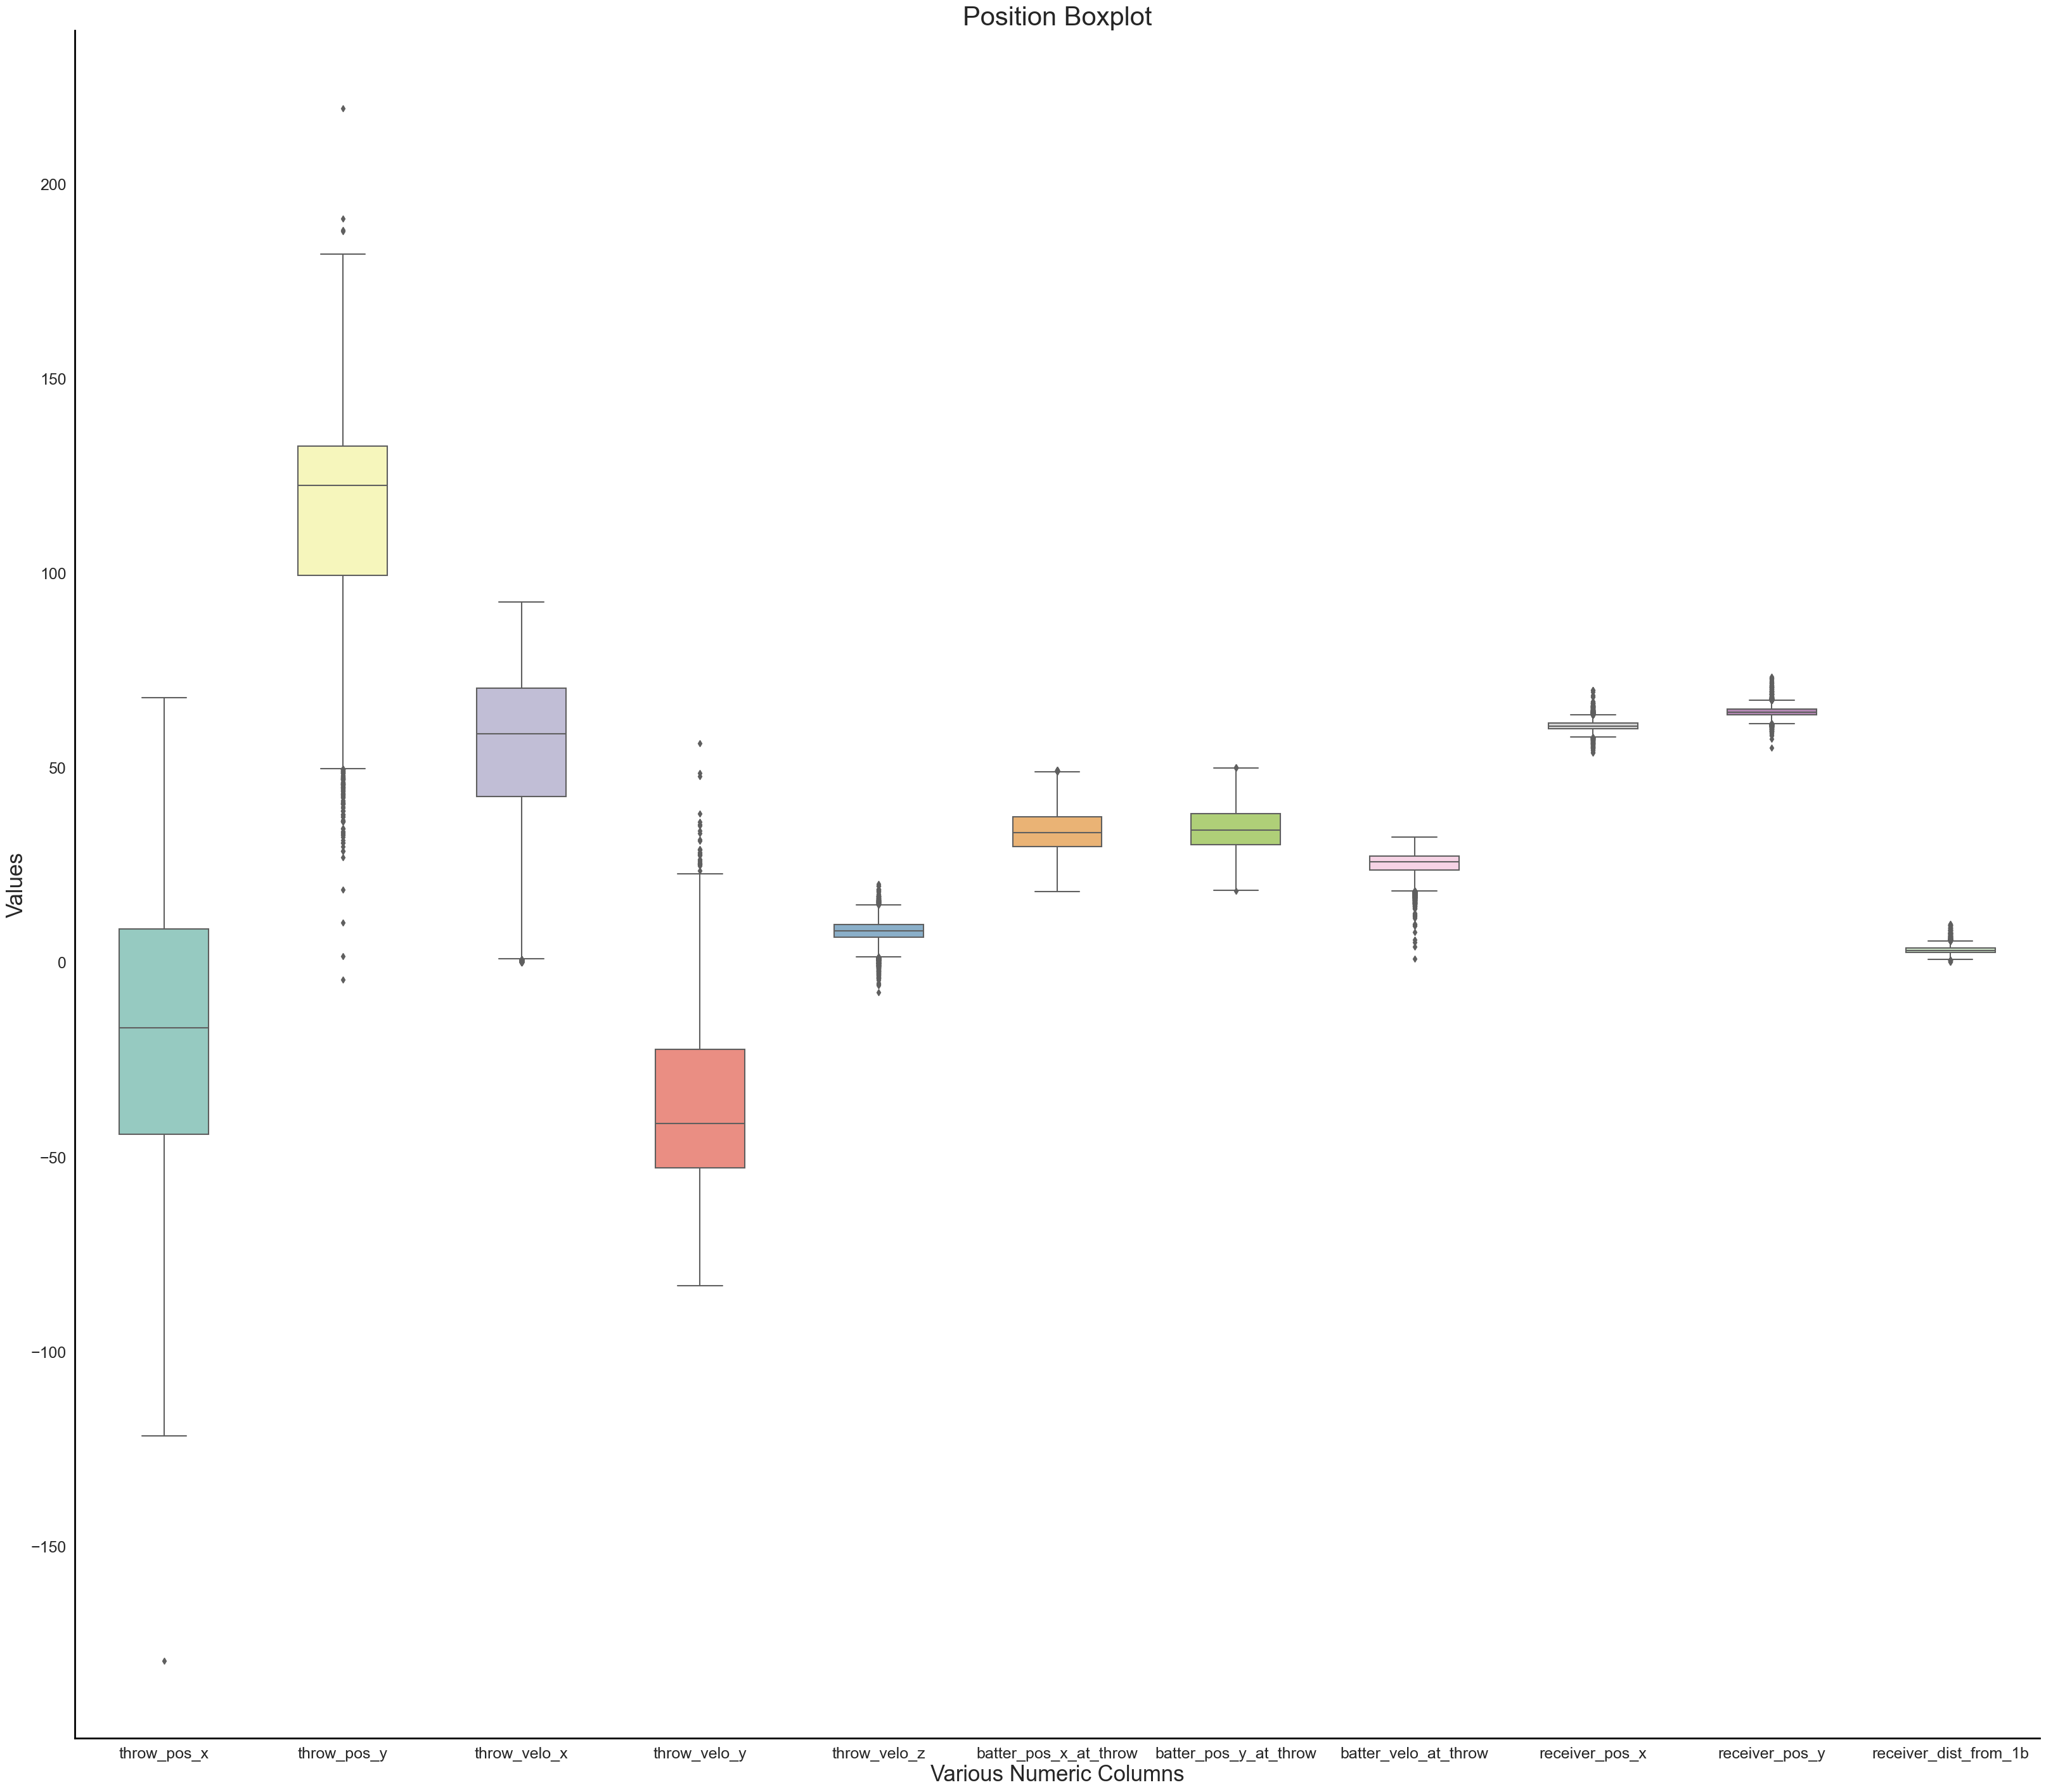

In [18]:
plt.figure(figsize=(40, 35))  
boxplot = sns.boxplot(data=data[['throw_pos_x', 'throw_pos_y', 'throw_velo_x', 'throw_velo_y', 'throw_velo_z',
                                 'batter_pos_x_at_throw', 'batter_pos_y_at_throw', 'batter_velo_at_throw',
                                 'receiver_pos_x', 'receiver_pos_y', 'receiver_dist_from_1b']], palette="Set3", width=0.5)

sns.set(font_scale=1.5)
plt.xlabel('Various Numeric Columns', fontsize=25)  
plt.ylabel('Values', fontsize=25)  
plt.title('Position Boxplot', fontsize=30)

plt.tick_params(axis='both', which='both', labelsize=18)

sns.despine()

boxplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.show()

In [19]:
sorted_dataset = data.sort_values(by='throw_pos_y', ascending=False)
data = sorted_dataset.iloc[3:]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
2099       3449        7         711                 5         711   
11162     18486        8         541                 4         541   
3610       5975        3         526                 4         526   
7764      12902       10         406                 4         406   
13777     22869        5         182                 6         182   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
2099                  5          615                  3          0.500   
11162                 4          563                  3          0.433   
3610                  4          816                  3          0.900   
7764                  4           46                  3          1.000   
13777                 6          766                  3          0.900   

       throw_pos_x  ...  batter_velo_at_throw  receiver_pos_x  receiver_pos_y  \
10951    53.056457  ...             23.232512       70.022860       65.796056   
17676    42.826112  ...             27.092771       63.090300       67.201313   
11597    64.948196  ...             29.096419       64.087660       66.328579   
14906    40.962718  ...             25.303047       59.768356       65.960367   
14034    50.878956  ...             27.490715       58.914281       64.505042   
...            ...  ...                   ...             ...             ...   
2099    -14.797592  ...             30.518328       59.803154       65.441891   
11162    21.790451  ...             25.394372       63.461448       66.913328   
3610      5.691260  ...             26.959647       60.238230       63.615895   
7764     -1.604287  ...             25.679727       61.120079       66.286846   
13777    -1.670457  ...             27.359515       59.588356       63.621590   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
10951               6.737666                            1        ____0   
17676               3.603813                            1        _2__1   
11597               2.726041                            0        ____0   
14906               4.513594                            0        ____0   
14034               4.803926                            0        ____1   
...                      ...                          ...          ...   
2099                4.238704                            0        ____2   
11162               3.278562                            0        ____0   
3610                3.401463                            0        ____1   
7764                3.654572                            0        1___2   
13777               4.051295                            0        _2__2   

       end_state  runs_on_play  batter_result  bounced_throw  
10951      1___0             0          first              0  
17676      1_3_1             0          first              1  
11597      1___0             0          first              0  
14906      ____1             0            out              0  
14034      1___1             0          first              1  
...          ...           ...       

I created a scatter plot with a simple diamond to view where the throws are made. Anything that was further left than -100 in the 'throw_pos_x' column was removed as these are unrealistic.

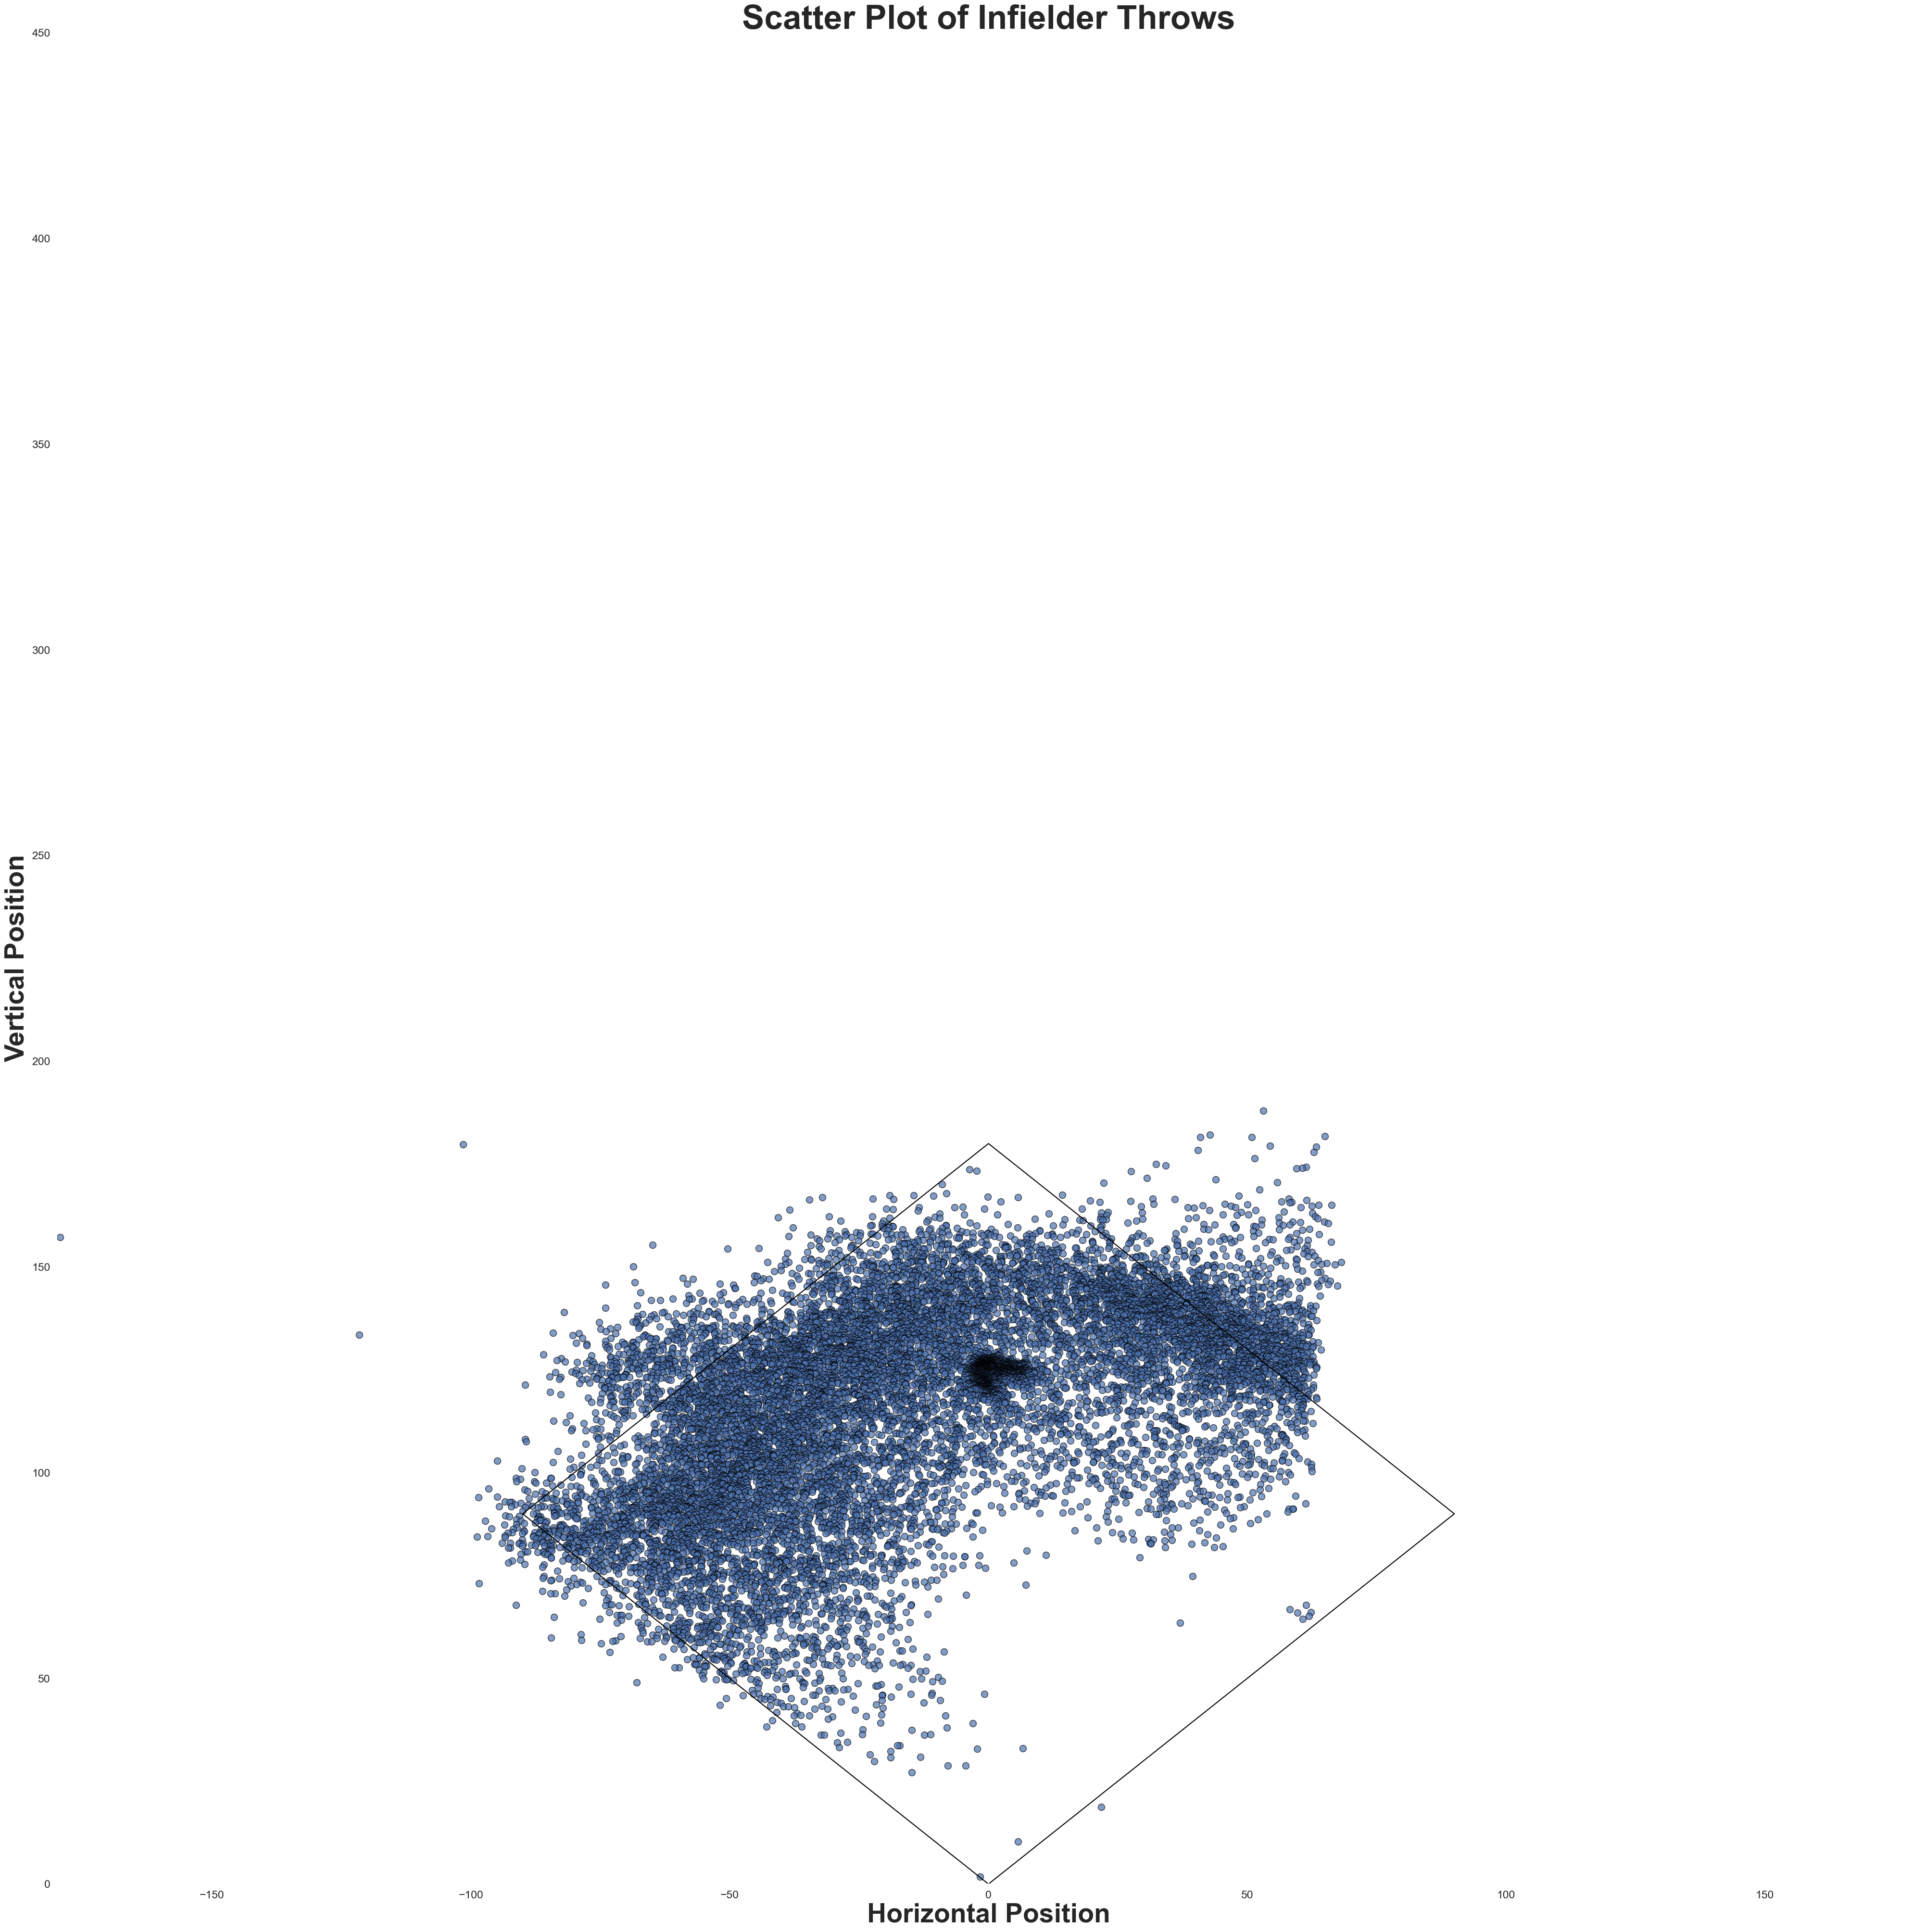

In [20]:
fig, ax = plt.subplots(figsize=(50,50))

ax.plot([0, 90, 0, -90, -0], [0, 90, 180, 90, 0], color='black')

scatter = ax.scatter(x=data['throw_pos_x'], y=data['throw_pos_y'], s=100, edgecolors='black', alpha=0.7)  # Adjust 's' as needed

ax.set_xlabel('Horizontal Position', fontsize=40, fontweight='bold')
ax.set_ylabel('Vertical Position', fontsize=40, fontweight='bold')
ax.set_title('Scatter Plot of Infielder Throws', fontsize=50, fontweight='bold')

ax.set_facecolor('none')

ax.set_xlim(-180, 180)
ax.set_ylim(0, 450)

plt.show()

In [21]:
data = data[data['throw_pos_x'] > -100]

Created another scatter plot as a check to see the remaining values. Everything else looks to be within realistic throwing distance to first base for an infielder.

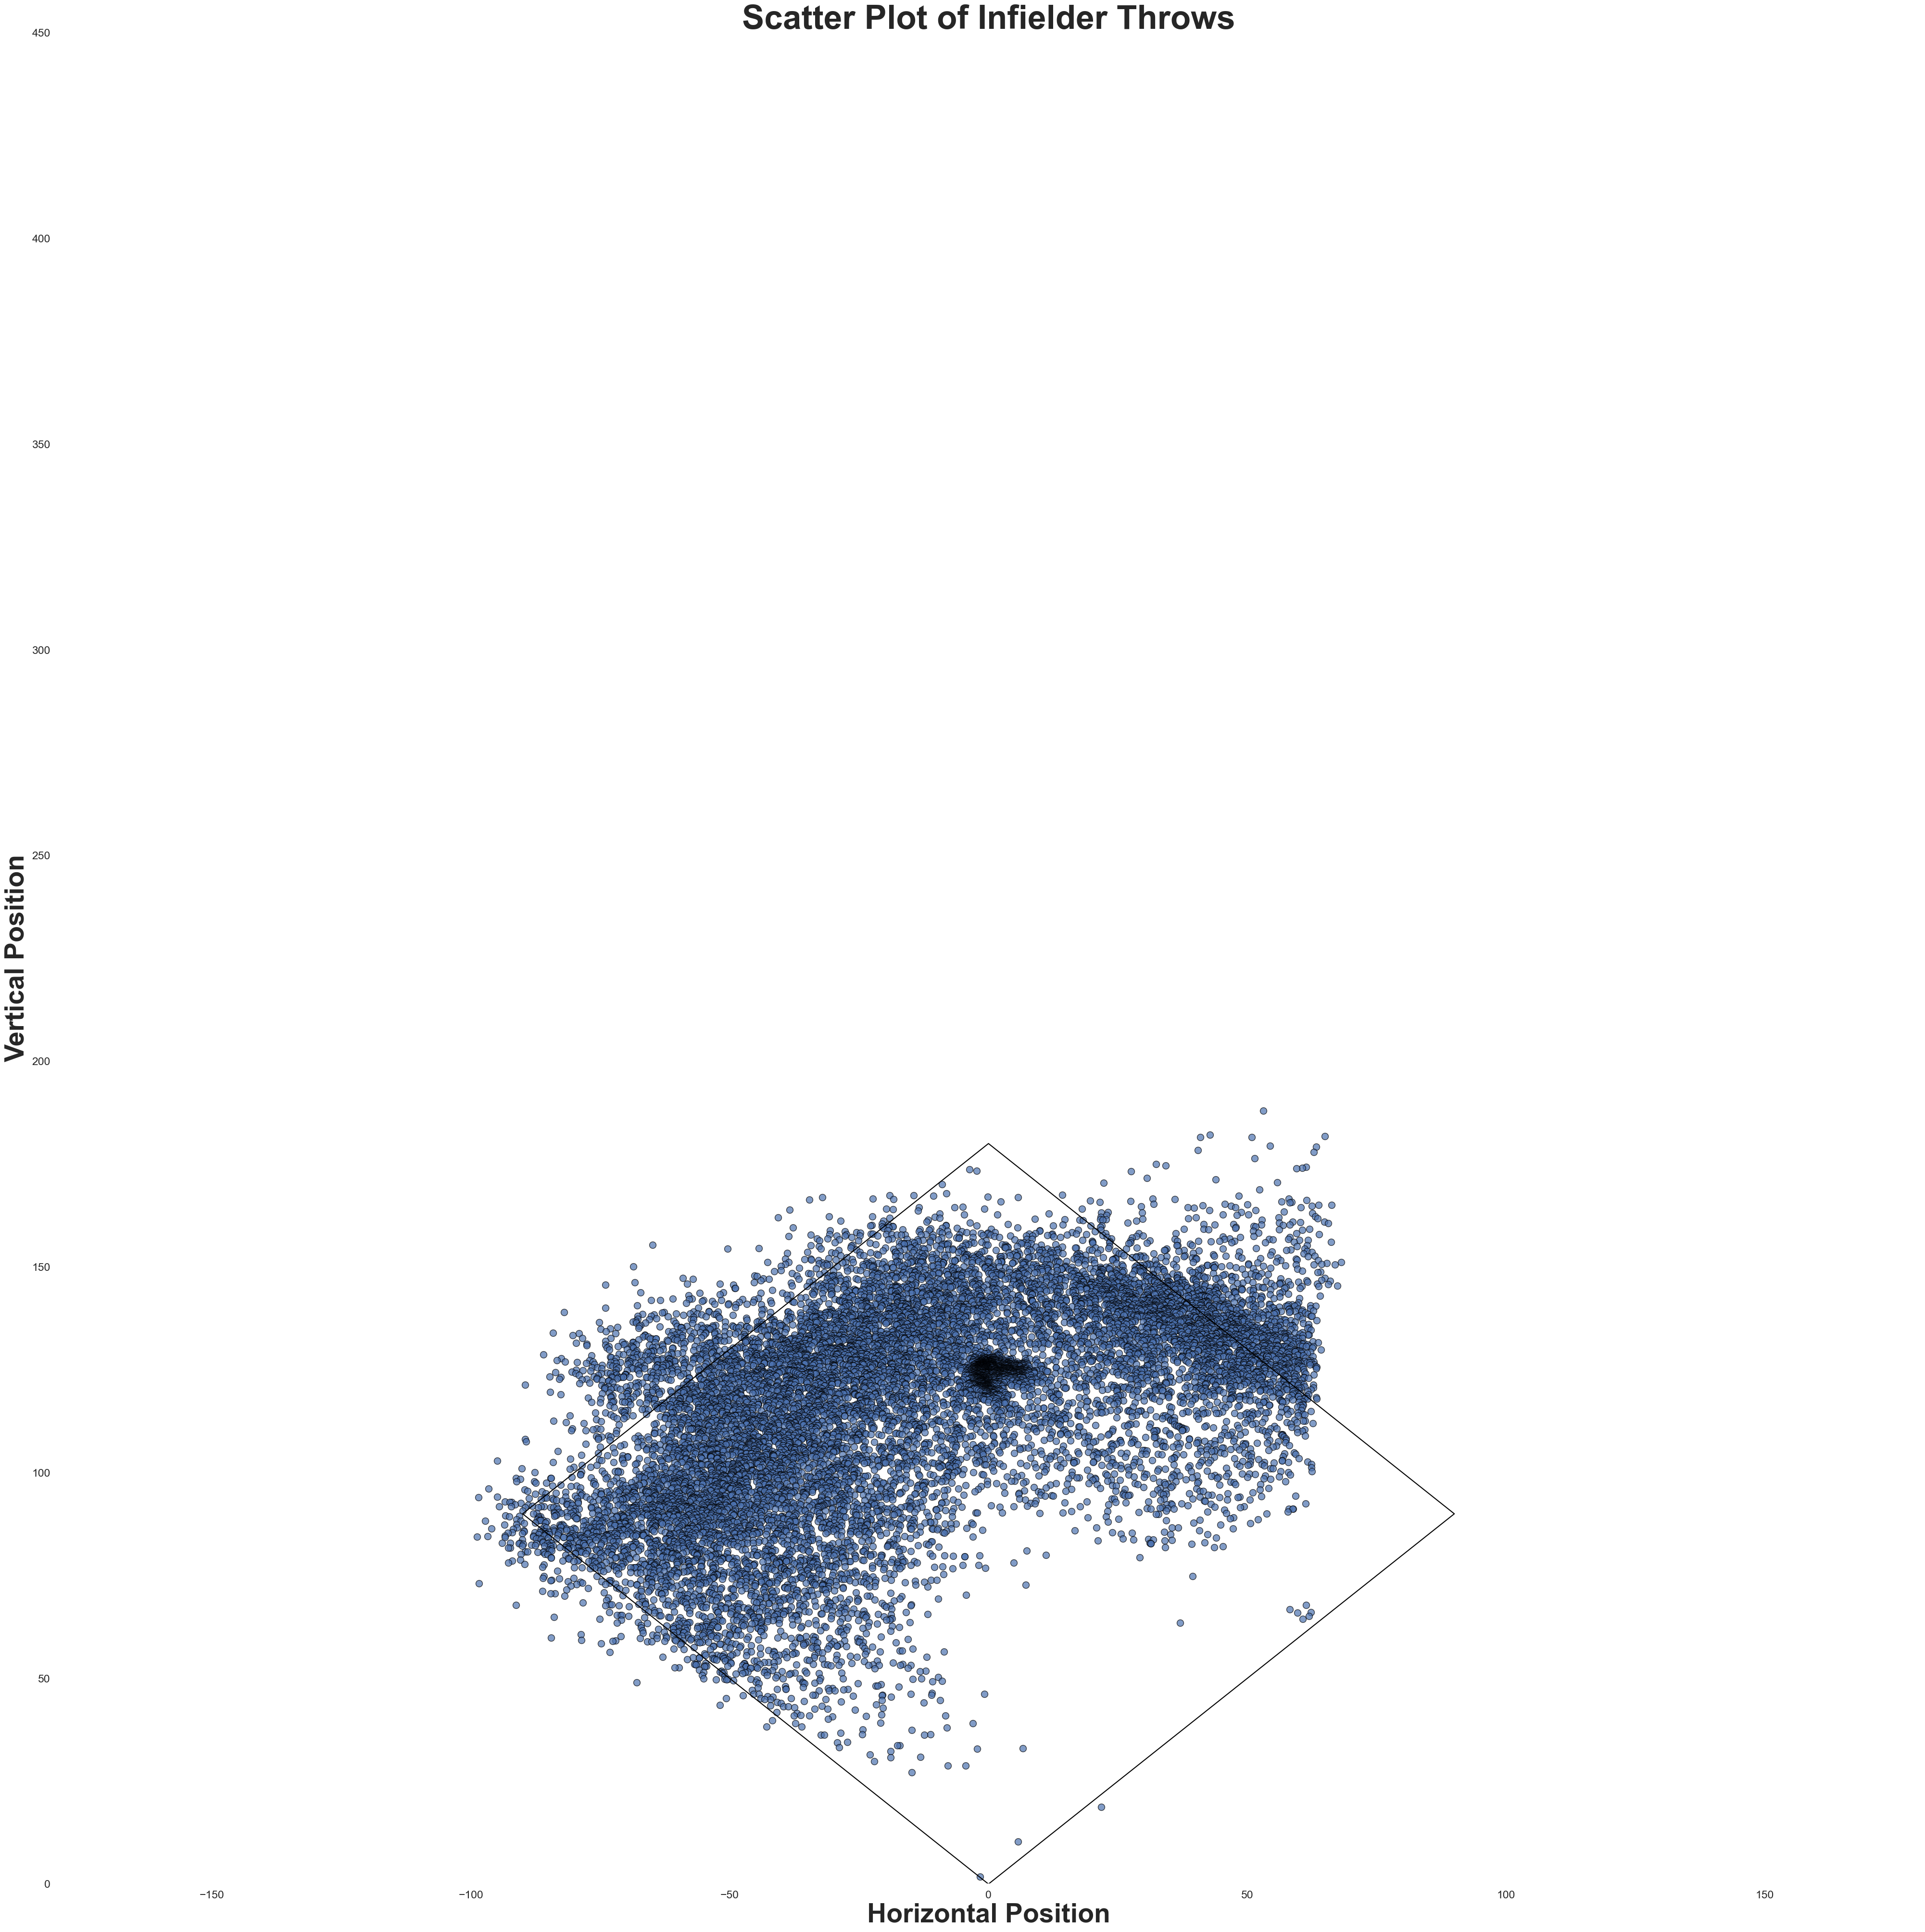

In [22]:
fig, ax = plt.subplots(figsize=(50,50))

ax.plot([0, 90, 0, -90, -0], [0, 90, 180, 90, 0], color='black')

scatter = ax.scatter(x=data['throw_pos_x'], y=data['throw_pos_y'], s=100, edgecolors='black', alpha=0.7)  # Adjust 's' as needed

ax.set_xlabel('Horizontal Position', fontsize=40, fontweight='bold')
ax.set_ylabel('Vertical Position', fontsize=40, fontweight='bold')
ax.set_title('Scatter Plot of Infielder Throws', fontsize=50, fontweight='bold')

ax.set_facecolor('none')

ax.set_xlim(-180, 180)
ax.set_ylim(0, 450)

plt.show()

I used the Euclidean distance formula to calculate how far the throw is. This formula takes the square root of beginning positions square plus the ending positions squared to determine the distance.

In [23]:
data['distance_to_1B'] = np.sqrt((data['throw_pos_x'] - data['receiver_pos_x'])**2 + (data['throw_pos_y'] - data['receiver_pos_y'])**2)
data

C:\Users\cboat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
2099       3449        7         711                 5         711   
11162     18486        8         541                 4         541   
3610       5975        3         526                 4         526   
7764      12902       10         406                 4         406   
13777     22869        5         182                 6         182   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
2099                  5          615                  3          0.500   
11162                 4          563                  3          0.433   
3610                  4          816                  3          0.900   
7764                  4           46                  3          1.000   
13777                 6          766                  3          0.900   

       throw_pos_x  ...  receiver_pos_x  receiver_pos_y  \
10951    53.056457  ...       70.022860       65.796056   
17676    42.826112  ...       63.090300       67.201313   
11597    64.948196  ...       64.087660       66.328579   
14906    40.962718  ...       59.768356       65.960367   
14034    50.878956  ...       58.914281       64.505042   
...            ...  ...             ...             ...   
2099    -14.797592  ...       59.803154       65.441891   
11162    21.790451  ...       63.461448       66.913328   
3610      5.691260  ...       60.238230       63.615895   
7764     -1.604287  ...       61.120079       66.286846   
13777    -1.670457  ...       59.588356       63.621590   

       receiver_dist_from_1b  throw_deflected_by_receiver  start_state  \
10951               6.737666                            1        ____0   
17676               3.603813                            1        _2__1   
11597               2.726041                            0        ____0   
14906               4.513594                            0        ____0   
14034               4.803926                            0        ____1   
...                      ...                          ...          ...   
2099                4.238704                            0        ____2   
11162               3.278562                            0        ____0   
3610                3.401463                            0        ____1   
7764                3.654572                            0        1___2   
13777               4.051295                            0        _2__2   

       end_state  runs_on_play  batter_result  bounced_throw  distance_to_1B  
10951      1___0             0          first              0      123.361032  
17676      1_3_1             0          first              1      116.686537  
11597      1___0             0          first              0      115.404201  
14906      ____1             0            out              0      117.135052  
14034      1___1             0          first              1      117.341209  
...          ...           ...            ...            ...             ...  
2099       ____3             0            out              0       83.869298  
11162      ____1             0            out  

I then used the Pythagorean Theorum to determing the hypoteneuse between all three velo columns. This should determine the actual speed the ball moves during the throw.

In [24]:
data['speed_mph'] = ((data['throw_velo_x'] ** 2 + data['throw_velo_y'] ** 2) ** 0.5) * 0.681818
data

C:\Users\cboat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
2099       3449        7         711                 5         711   
11162     18486        8         541                 4         541   
3610       5975        3         526                 4         526   
7764      12902       10         406                 4         406   
13777     22869        5         182                 6         182   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
2099                  5          615                  3          0.500   
11162                 4          563                  3          0.433   
3610                  4          816                  3          0.900   
7764                  4           46                  3          1.000   
13777                 6          766                  3          0.900   

       throw_pos_x  ...  receiver_pos_y  receiver_dist_from_1b  \
10951    53.056457  ...       65.796056               6.737666   
17676    42.826112  ...       67.201313               3.603813   
11597    64.948196  ...       66.328579               2.726041   
14906    40.962718  ...       65.960367               4.513594   
14034    50.878956  ...       64.505042               4.803926   
...            ...  ...             ...                    ...   
2099    -14.797592  ...       65.441891               4.238704   
11162    21.790451  ...       66.913328               3.278562   
3610      5.691260  ...       63.615895               3.401463   
7764     -1.604287  ...       66.286846               3.654572   
13777    -1.670457  ...       63.621590               4.051295   

       throw_deflected_by_receiver  start_state  end_state  runs_on_play  \
10951                            1        ____0      1___0             0   
17676                            1        _2__1      1_3_1             0   
11597                            0        ____0      1___0             0   
14906                            0        ____0      ____1             0   
14034                            0        ____1      1___1             0   
...                            ...          ...        ...           ...   
2099                             0        ____2      ____3             0   
11162                            0        ____0      ____1             0   
3610                             0        ____1      ____2             0   
7764                             0        1___2      ____3             0   
13777                            0        _2__2      ____3             0   

       batter_result  bounced_throw  distance_to_1B  speed_mph  
10951          first              0      123.361032  41.848457  
17676          first              1      116.686537  52.260682  
11597          first              0      115.404201  53.391482  
14906            out              0      117.135052  40.739734  
14034          first              1      117.341209  40.148993  
...              ...            ...             ...        ...  
2099             out              0       83.869298  48.686363  
11162            out              0       63.672253

I then looked for throws that were thrown softer than or equal to 40mph and more than 30 feet away. Anything slower than 40mph if thrown at a distance longer than 30 feet is unrealistic in my opinion because that speed constitutes a flip. To flip a ball anything further than 30 feet isn't a serious throw and shouldn't be taken into consideration.

In [25]:
filtered_df = data[(data['speed_mph'] >= 0) & (data['speed_mph'] <= 40) & (data['distance_to_1B'] > 30)]
filtered_df

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
17783     29598        8         541                 4         541   
19948     33113        9         316                 4         316   
11772     19500       15         592                 6         592   
17749     29550       13         687                 4         687   
12909     21418        7         673                 4         673   
...         ...      ...         ...               ...         ...   
19764     32837       11         731                 5         731   
11162     18486        8         541                 4         541   
3610       5975        3         526                 4         526   
7764      12902       10         406                 4         406   
13777     22869        5         182                 6         182   

       thrower_position  receiver_id  receiver_position  exchange_time  \
17783                 4          857                  3          0.733   
19948                 4          856                  3          0.666   
11772                 6          568                  3          0.734   
17749                 4          310                  3          0.834   
12909                 4           17                  3          0.733   
...                 ...          ...                ...            ...   
19764                 5          482                  3          0.500   
11162                 4          563                  3          0.433   
3610                  4          816                  3          0.900   
7764                  4           46                  3          1.000   
13777                 6          766                  3          0.900   

       throw_pos_x  ...  receiver_pos_y  receiver_dist_from_1b  \
17783    54.399686  ...       66.373557               2.801574   
19948    62.848564  ...       67.488003               3.853647   
11772    27.587909  ...       64.125824               5.143263   
17749    56.631932  ...       65.420764               3.282242   
12909    -4.974687  ...       62.858516               4.734953   
...            ...  ...             ...                    ...   
19764   -31.708306  ...       62.912946               4.359880   
11162    21.790451  ...       66.913328               3.278562   
3610      5.691260  ...       63.615895               3.401463   
7764     -1.604287  ...       66.286846               3.654572   
13777    -1.670457  ...       63.621590               4.051295   

       throw_deflected_by_receiver  start_state  end_state  runs_on_play  \
17783                            0        ____2      ____3             0   
19948                            0        ____2      1___2             0   
11772                            0        ____1      1___1             0   
17749                            0        1___2      ____3             0   
12909                            0        ____1      1___1             0   
...                            ...          ...        ...           ...   
19764                            0        1___1      _2__2             0   
11162                            0        ____0      ____1             0   
3610                             0        ____1      ____2             0   
7764                             0        1___2      ____3             0   
13777                            0        _2__2      ____3             0   

       batter_result  bounced_throw  distance_to_1B  speed_mph  
17783            out              1      113.407858  38.926471  
19948          first              1      110.460309  37.813052  
11772          first              1      113.456554  33.819985  
17749            out              1      100.604149  38.002962  
12909          first              1      120.139267  37.308969  
...              ...            ...             ...        ...  
19764            out              0       94.861408  38.458569  
11162            out              0       63.672253

I then checked the distance most throws were made from first base. Everything is within reason distance wise.

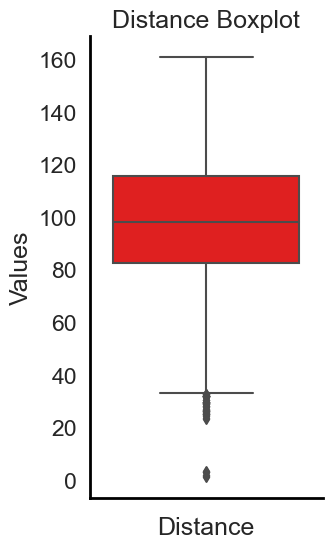

In [26]:
plt.figure(figsize=(3, 6)) 
boxplot = sns.boxplot(data=data, y='distance_to_1B', color='red')

sns.set(font_scale=1.5) 
plt.xlabel('Distance')
plt.ylabel('Values')
plt.title('Distance Boxplot')


sns.despine()

boxplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

    
# Show the boxplot
plt.show()

I then filtered out some outlier data based on the definition mentioned above and anythin thrown under 30mph. 30mph throws I'd consider to be under handed or wrist flips and don't resemble the majority of throws an infielder would make. Even though there's very few of them, I don't want the possibility of the data to be skewed in anyway, so I omitted them.

In [27]:
data = data[~data.index.isin(filtered_df.index)]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
16341     27123       11         212                 5         212   
13939     23132       11         785                 5         785   
6015       9985       13         687                 5         687   
18329     30493        6         241                 5         241   
2099       3449        7         711                 5         711   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
16341                 5          560                  3          0.767   
13939                 5          560                  3          0.567   
6015                  5          408                  3          0.734   
18329                 5           25                  3          0.434   
2099                  5          615                  3          0.500   

       throw_pos_x  ...  receiver_pos_y  receiver_dist_from_1b  \
10951    53.056457  ...       65.796056               6.737666   
17676    42.826112  ...       67.201313               3.603813   
11597    64.948196  ...       66.328579               2.726041   
14906    40.962718  ...       65.960367               4.513594   
14034    50.878956  ...       64.505042               4.803926   
...            ...  ...             ...                    ...   
16341   -18.951507  ...       65.454043               2.941427   
13939   -22.048931  ...       65.577217               2.835874   
6015     -4.444144  ...       65.957075               3.969172   
18329    -7.832513  ...       63.166741               3.913818   
2099    -14.797592  ...       65.441891               4.238704   

       throw_deflected_by_receiver  start_state  end_state  runs_on_play  \
10951                            1        ____0      1___0             0   
17676                            1        _2__1      1_3_1             0   
11597                            0        ____0      1___0             0   
14906                            0        ____0      ____1             0   
14034                            0        ____1      1___1             0   
...                            ...          ...        ...           ...   
16341                            0        12__0      _23_1             0   
13939                            0        1___0      _2__1             0   
6015                             0        _2__0      __3_1             0   
18329                            0        1___0      _2__1             0   
2099                             0        ____2      ____3             0   

       batter_result  bounced_throw  distance_to_1B  speed_mph  
10951          first              0      123.361032  41.848457  
17676          first              1      116.686537  52.260682  
11597          first              0      115.404201  53.391482  
14906            out              0      117.135052  40.739734  
14034          first              1      117.341209  40.148993  
...              ...            ...             ...        ...  
16341            out              0       87.442434  46.348671  
13939            out              0       90.952302

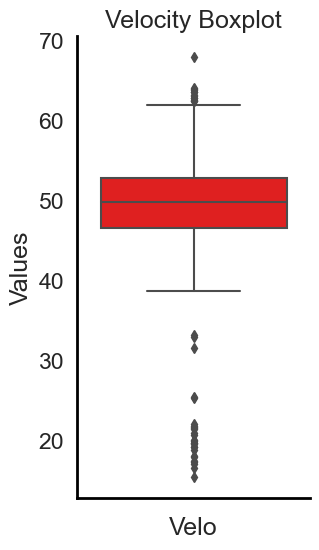

In [28]:
plt.figure(figsize=(3, 6)) 
boxplot = sns.boxplot(data=data, y='speed_mph', color='red')

sns.set(font_scale=1.5) 
plt.xlabel('Velo')
plt.ylabel('Values')
plt.title('Velocity Boxplot')


sns.despine()

boxplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.show()

In [29]:
data = data[data['speed_mph'] > 30]
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
16341     27123       11         212                 5         212   
13939     23132       11         785                 5         785   
6015       9985       13         687                 5         687   
18329     30493        6         241                 5         241   
2099       3449        7         711                 5         711   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
16341                 5          560                  3          0.767   
13939                 5          560                  3          0.567   
6015                  5          408                  3          0.734   
18329                 5           25                  3          0.434   
2099                  5          615                  3          0.500   

       throw_pos_x  ...  receiver_pos_y  receiver_dist_from_1b  \
10951    53.056457  ...       65.796056               6.737666   
17676    42.826112  ...       67.201313               3.603813   
11597    64.948196  ...       66.328579               2.726041   
14906    40.962718  ...       65.960367               4.513594   
14034    50.878956  ...       64.505042               4.803926   
...            ...  ...             ...                    ...   
16341   -18.951507  ...       65.454043               2.941427   
13939   -22.048931  ...       65.577217               2.835874   
6015     -4.444144  ...       65.957075               3.969172   
18329    -7.832513  ...       63.166741               3.913818   
2099    -14.797592  ...       65.441891               4.238704   

       throw_deflected_by_receiver  start_state  end_state  runs_on_play  \
10951                            1        ____0      1___0             0   
17676                            1        _2__1      1_3_1             0   
11597                            0        ____0      1___0             0   
14906                            0        ____0      ____1             0   
14034                            0        ____1      1___1             0   
...                            ...          ...        ...           ...   
16341                            0        12__0      _23_1             0   
13939                            0        1___0      _2__1             0   
6015                             0        _2__0      __3_1             0   
18329                            0        1___0      _2__1             0   
2099                             0        ____2      ____3             0   

       batter_result  bounced_throw  distance_to_1B  speed_mph  
10951          first              0      123.361032  41.848457  
17676          first              1      116.686537  52.260682  
11597          first              0      115.404201  53.391482  
14906            out              0      117.135052  40.739734  
14034          first              1      117.341209  40.148993  
...              ...            ...             ...        ...  
16341            out              0       87.442434  46.348671  
13939            out              0       90.952302

In [30]:
pd.set_option('display.max_columns', 28)
data.head()

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   

       throw_pos_x  throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951    53.056457   187.984784     13.050047    -59.974368     11.814407   
17676    42.826112   182.114806     14.402262    -75.283777      5.421098   
11597    64.948196   181.729572      1.763758    -78.287662      7.114885   
14906    40.962718   181.575974     11.820008    -58.570848     10.621978   
14034    50.878956   181.570805      5.222105    -58.653193      9.253620   

       batter_pos_x_at_throw  batter_pos_y_at_throw  batter_velo_at_throw  \
10951              32.560147              32.758630             23.232512   
17676              36.753085              37.826522             27.092771   
11597              39.159793              39.623088             29.096419   
14906              25.354392              28.313887             25.303047   
14034              31.649026              31.052163             27.490715   

       receiver_pos_x  receiver_pos_y  receiver_dist_from_1b  \
10951       70.022860       65.796056               6.737666   
17676       63.090300       67.201313               3.603813   
11597       64.087660       66.328579               2.726041   
14906       59.768356       65.960367               4.513594   
14034       58.914281       64.505042               4.803926   

       throw_deflected_by_receiver start_state end_state  runs_on_play  \
10951                            1       ____0     1___0             0   
17676                            1       _2__1     1_3_1             0   
11597                            0       ____0     1___0             0   
14906                            0       ____0     ____1             0   
14034                            0       ____1     1___1             0   

      batter_result  bounced_throw  distance_to_1B  speed_mph  
10951         first              0      123.361032  41.848457  
17676         first              1      116.686537  52.260682  
11597         first              0      115.404201  53.391482  
14906           out              0      117.135052  40.739734  
14034         first              1      117.341209  40.148993

I did more data exploration to see if there are any columns that are correlated to each other. This would help me identify which columns could bring noise to the predictive model. I found it interesting that velocity didn't correlate to the infielder's exchange time or wild throws. When I played, usually the infielder that had rocket's for arms would take their time when exchanging the ball before making the throw. I also found that it's harder to control my throws when I try to throw them as hard as I could when I fielded.

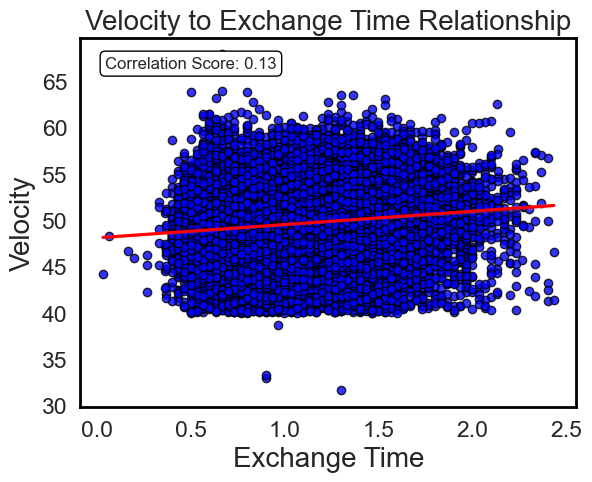

In [31]:
scatterplot = sns.regplot(data = data, x="exchange_time", y="speed_mph", scatter_kws={"color": "blue", "edgecolor": "black"}, line_kws={"color": "red"})

plt.xlabel('Exchange Time', fontsize=20)
plt.ylabel('Velocity', fontsize=20)
plt.title('Velocity to Exchange Time Relationship', fontsize=20)

scatterplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

correlation_score = data['exchange_time'].corr(data['speed_mph'])
plt.text(0.05, 0.95, f'Correlation Score: {correlation_score:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))    

plt.show()

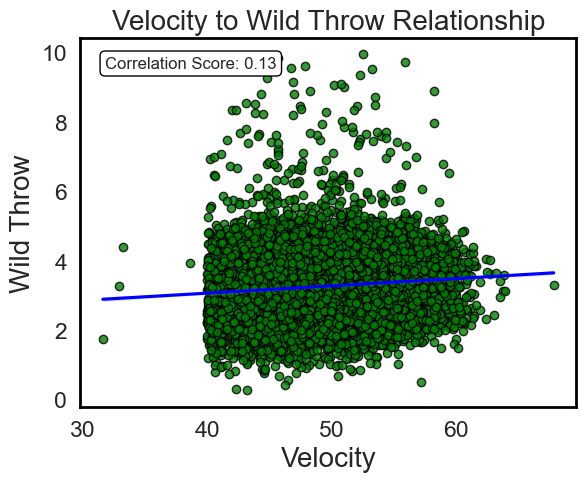

In [32]:
scatterplot = sns.regplot(data = data, x="speed_mph", y="receiver_dist_from_1b", scatter_kws={"color": "green", "edgecolor": "black"}, line_kws={"color": "blue"})

plt.xlabel('Velocity', fontsize=20)
plt.ylabel('Wild Throw', fontsize=20)
plt.title('Velocity to Wild Throw Relationship', fontsize=20)

scatterplot.set_facecolor('xkcd:white')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

correlation_score = data['exchange_time'].corr(data['speed_mph'])
plt.text(0.05, 0.95, f'Correlation Score: {correlation_score:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))    

plt.show()

In [33]:
data.dtypes

throw_id                         int64
team_id                          int64
fielder_id                       int64
fielder_position                 int64
thrower_id                       int64
thrower_position                 int64
receiver_id                      int64
receiver_position                int64
exchange_time                  float64
throw_pos_x                    float64
throw_pos_y                    float64
throw_velo_x                   float64
throw_velo_y                   float64
throw_velo_z                   float64
batter_pos_x_at_throw          float64
batter_pos_y_at_throw          float64
batter_velo_at_throw           float64
receiver_pos_x                 float64
receiver_pos_y                 float64
receiver_dist_from_1b          float64
throw_deflected_by_receiver      int64
start_state                     object
end_state                       object
runs_on_play                     int64
batter_result                   object
bounced_throw            

The 'Batter_result' column is in text form, so instead of creating a for loop, I simply made dummy variables for the column's values. This allows me to have three binary columns to show the results of each throw. Now that this is created, I drop the 'batter_result' column along with three others I deemed as not important to the predictive model. The 'receiver_position' is all 3 because the first base man catches the ball for each throw so I removed that column and the start and end state columns because they're similar to the binary columns.

In [34]:
dummies = pd.get_dummies(data[['batter_result']], dtype=float)
dummies

batter_result_first  batter_result_out  batter_result_second
10951                  1.0                0.0                   0.0
17676                  1.0                0.0                   0.0
11597                  1.0                0.0                   0.0
14906                  0.0                1.0                   0.0
14034                  1.0                0.0                   0.0
...                    ...                ...                   ...
16341                  0.0                1.0                   0.0
13939                  0.0                1.0                   0.0
6015                   0.0                1.0                   0.0
18329                  0.0                1.0                   0.0
2099                   0.0                1.0                   0.0

[14035 rows x 3 columns]

In [35]:
data = pd.concat([data, dummies], axis=1)
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
16341     27123       11         212                 5         212   
13939     23132       11         785                 5         785   
6015       9985       13         687                 5         687   
18329     30493        6         241                 5         241   
2099       3449        7         711                 5         711   

       thrower_position  receiver_id  receiver_position  exchange_time  \
10951                 4          339                  3          0.733   
17676                 4          615                  3          0.666   
11597                 6          563                  3          0.734   
14906                 4          354                  3          1.000   
14034                 6          563                  3          0.767   
...                 ...          ...                ...            ...   
16341                 5          560                  3          0.767   
13939                 5          560                  3          0.567   
6015                  5          408                  3          0.734   
18329                 5           25                  3          0.434   
2099                  5          615                  3          0.500   

       throw_pos_x  throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951    53.056457   187.984784     13.050047    -59.974368     11.814407   
17676    42.826112   182.114806     14.402262    -75.283777      5.421098   
11597    64.948196   181.729572      1.763758    -78.287662      7.114885   
14906    40.962718   181.575974     11.820008    -58.570848     10.621978   
14034    50.878956   181.570805      5.222105    -58.653193      9.253620   
...            ...          ...           ...           ...           ...   
16341   -18.951507    30.784961     62.540749     26.639679      5.359556   
13939   -22.048931    29.794816     58.129708     28.249977      7.519473   
6015     -4.444144    28.800199     57.093302     35.508388      7.063452   
18329    -7.832513    28.798849     60.146459     35.165871      6.166384   
2099    -14.797592    27.117123     62.836684     33.918517      6.951708   

       ...  receiver_pos_x  receiver_pos_y  receiver_dist_from_1b  \
10951  ...       70.022860       65.796056               6.737666   
17676  ...       63.090300       67.201313               3.603813   
11597  ...       64.087660       66.328579               2.726041   
14906  ...       59.768356       65.960367               4.513594   
14034  ...       58.914281       64.505042               4.803926   
...    ...             ...             ...                    ...   
16341  ...       61.324480       65.454043               2.941427   
13939  ...       61.568895       65.577217               2.835874   
6015   ...       60.417237       65.957075               3.969172   
18329  ...       59.754464       63.166741               3.913818   
2099   ...       59.803154       65.441891               4.238704   

       throw_deflected_by_receiver  start_state  end_state  runs_on_play  \
10951                            1        ____0      1___0             0   
17676                            1        _2__1      1_3_1             0   
11597                            0        ____0      1___0             0   
14906                            0        ____0      ____1             0   
14034                            0        ____1      1___1             0   
...                            ...          ...        ...         

In [36]:
data = data.drop(['batter_result', 'start_state', 'end_state', 'receiver_position'], axis=1)
data

throw_id  team_id  fielder_id  fielder_position  thrower_id  \
10951     18139        7         159                 4         159   
17676     29428        7         828                 4         828   
11597     19203        8         306                 6         306   
14906     24746        1         187                 4         187   
14034     23284        8         306                 6         306   
...         ...      ...         ...               ...         ...   
16341     27123       11         212                 5         212   
13939     23132       11         785                 5         785   
6015       9985       13         687                 5         687   
18329     30493        6         241                 5         241   
2099       3449        7         711                 5         711   

       thrower_position  receiver_id  exchange_time  throw_pos_x  throw_pos_y  \
10951                 4          339          0.733    53.056457   187.984784   
17676                 4          615          0.666    42.826112   182.114806   
11597                 6          563          0.734    64.948196   181.729572   
14906                 4          354          1.000    40.962718   181.575974   
14034                 6          563          0.767    50.878956   181.570805   
...                 ...          ...            ...          ...          ...   
16341                 5          560          0.767   -18.951507    30.784961   
13939                 5          560          0.567   -22.048931    29.794816   
6015                  5          408          0.734    -4.444144    28.800199   
18329                 5           25          0.434    -7.832513    28.798849   
2099                  5          615          0.500   -14.797592    27.117123   

       throw_velo_x  throw_velo_y  throw_velo_z  batter_pos_x_at_throw  \
10951     13.050047    -59.974368     11.814407              32.560147   
17676     14.402262    -75.283777      5.421098              36.753085   
11597      1.763758    -78.287662      7.114885              39.159793   
14906     11.820008    -58.570848     10.621978              25.354392   
14034      5.222105    -58.653193      9.253620              31.649026   
...             ...           ...           ...                    ...   
16341     62.540749     26.639679      5.359556              36.368172   
13939     58.129708     28.249977      7.519473              33.492408   
6015      57.093302     35.508388      7.063452              37.801369   
18329     60.146459     35.165871      6.166384              41.012215   
2099      62.836684     33.918517      6.951708              38.692853   

       batter_pos_y_at_throw  batter_velo_at_throw  receiver_pos_x  \
10951              32.758630             23.232512       70.022860   
17676              37.826522             27.092771       63.090300   
11597              39.623088             29.096419       64.087660   
14906              28.313887             25.303047       59.768356   
14034              31.052163             27.490715       58.914281   
...                      ...                   ...             ...   
16341              37.823031             25.173281       61.324480   
13939              35.025439             27.491477       61.568895   
6015               40.000578             29.321458       60.417237   
18329              42.580872             30.659285       59.754464   
2099               38.531133             30.518328       59.803154   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
10951       65.796056               6.737666                            1   
17676       67.201313               3.603813                            1   
11597       66.328579               2.726041                            0   
14906       65.960367               4.513594                            0   
14034       64.505042               4.803926                            0   
.

The correlation plot below shows the correlation scores between each attribute. This would allow me to see if there's any noise that could occur within the model. There are plenty of correlated columns so some will be removed but some are integral to the model so those will be kept.

C:\Users\cboat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


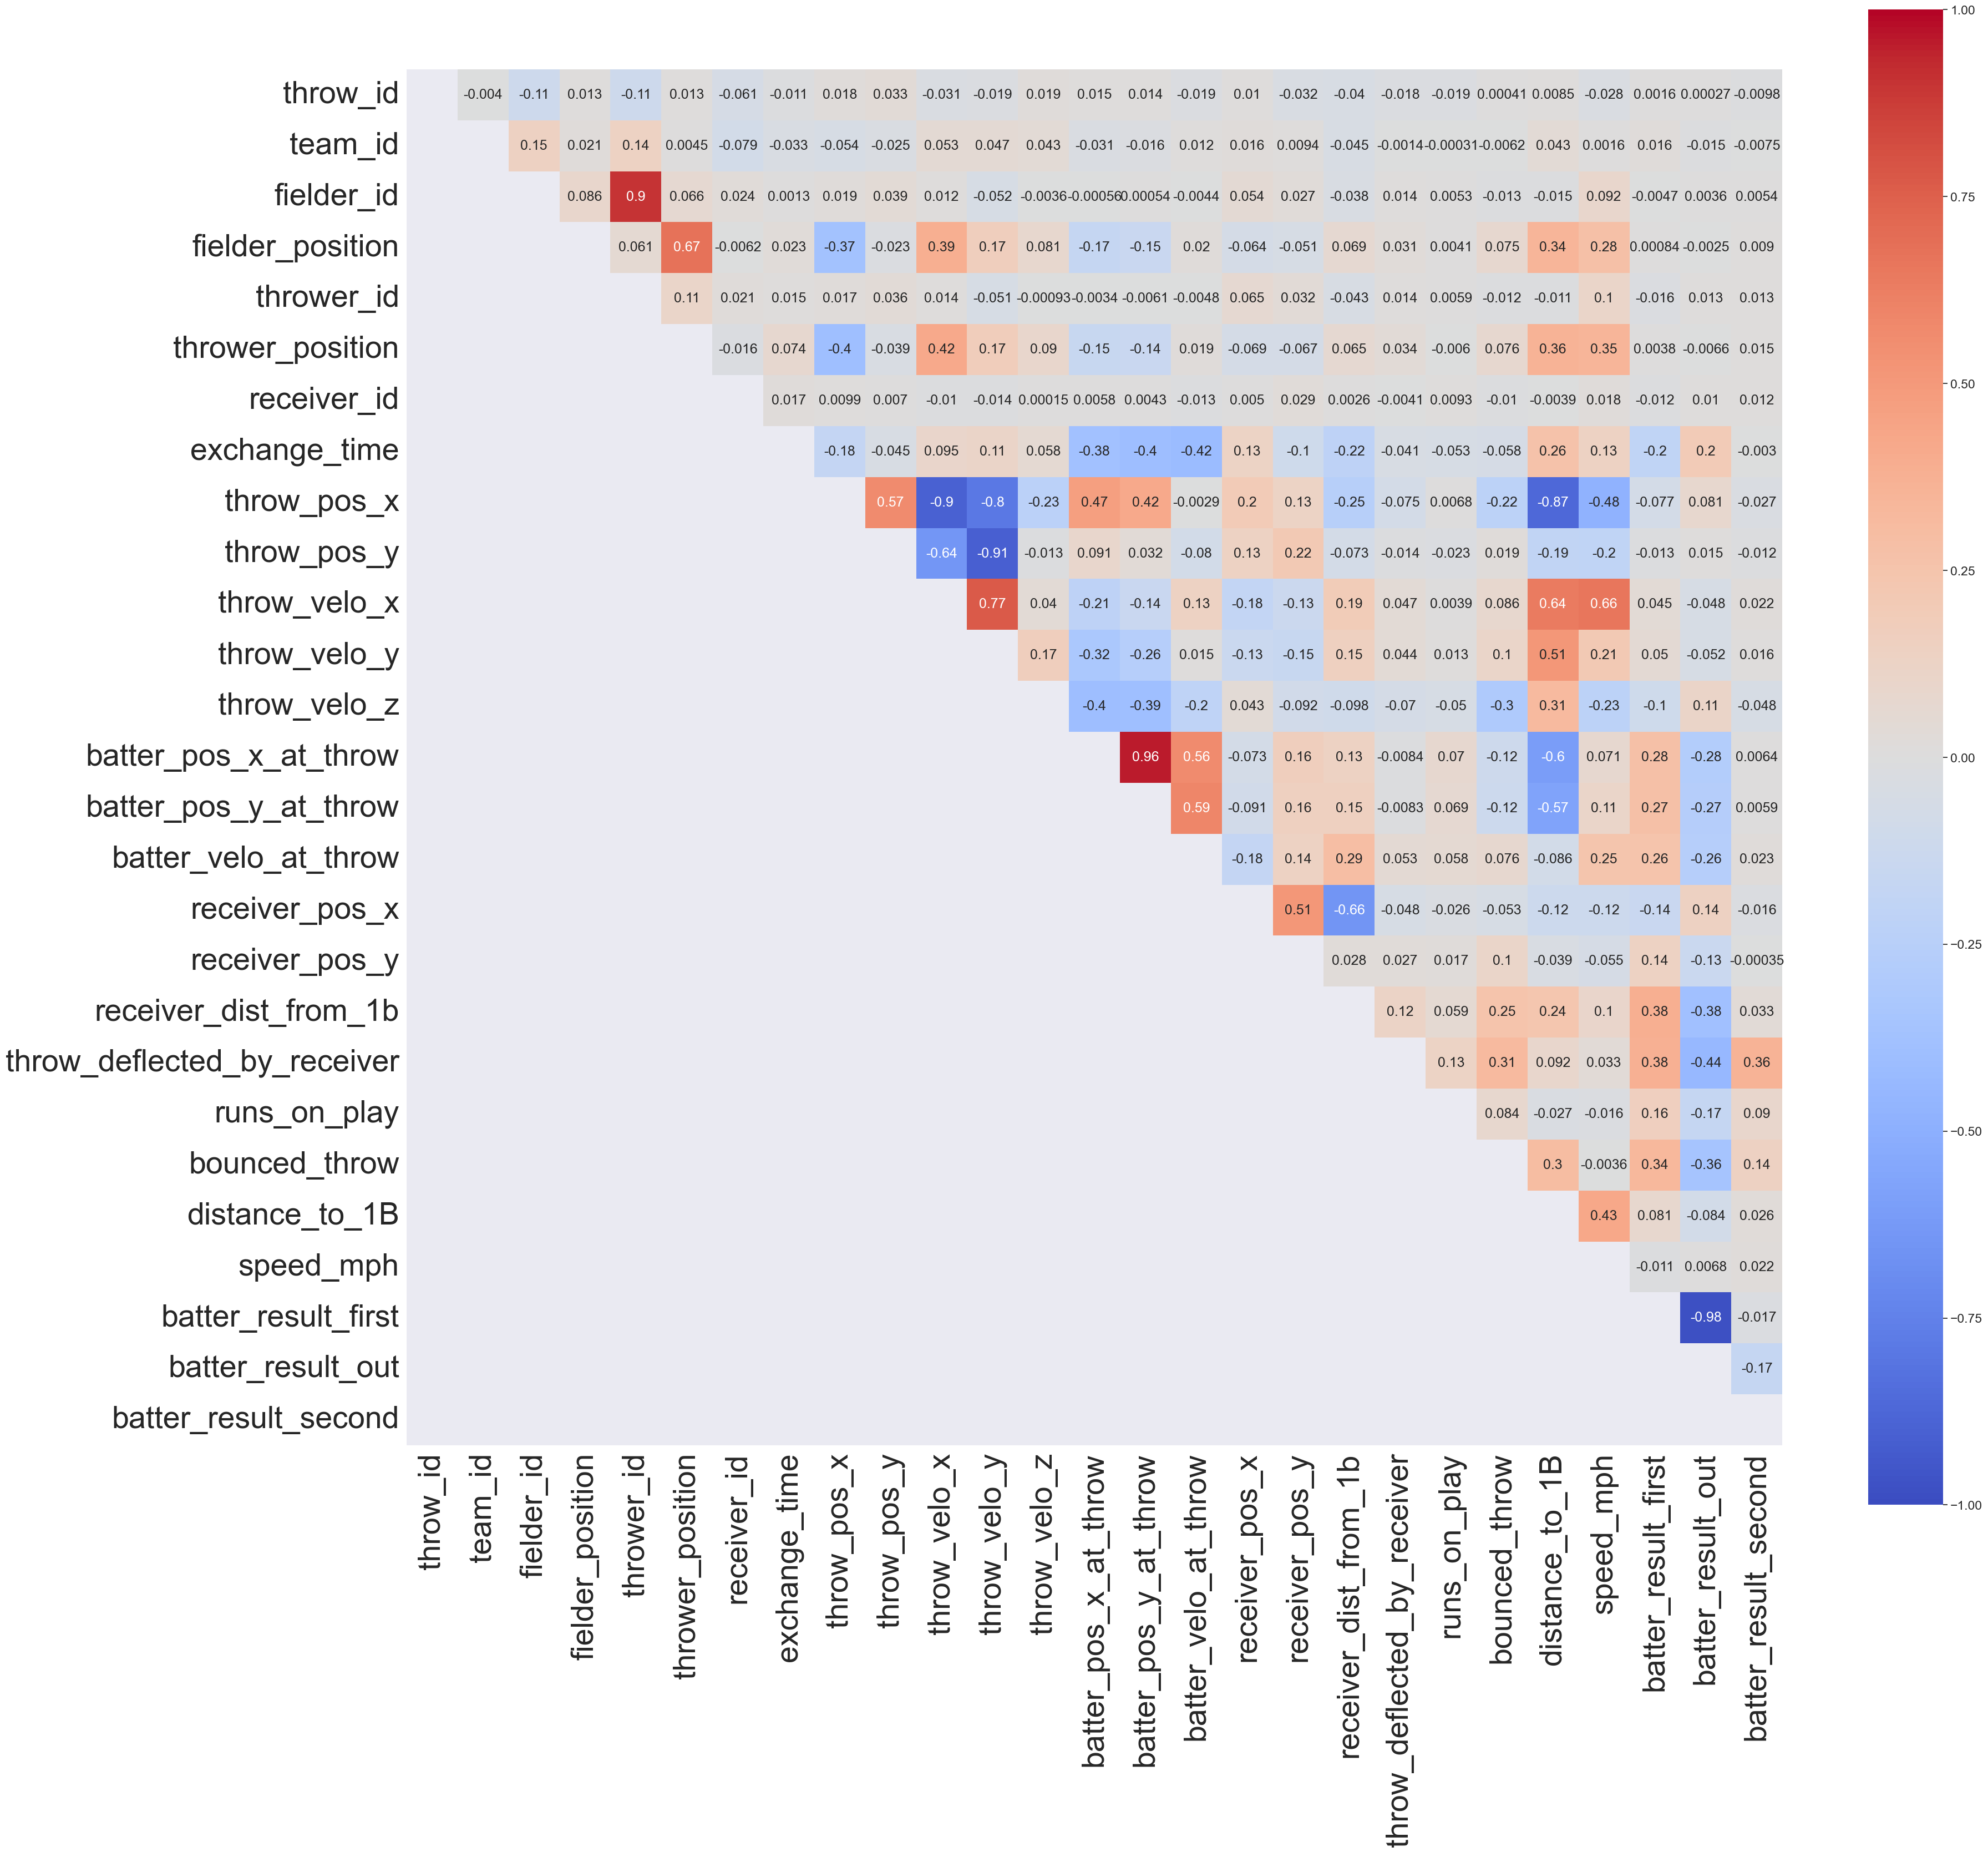

In [37]:
corr = data.corr()
np.fill_diagonal(corr.values, 0)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
plt.figure(figsize=(40, 35))
sns.heatmap(upper, cmap='coolwarm', vmax=1, vmin=-1, annot=True, square=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

I created my target and features data frames in preparation for data splitting and the predictive model. My dependent variable is 'batter_result_out' because I want to see how well infielder throw the ball to obtain outs above average.

I removed columns below that will provide noise to the model or are insignificant to the model all together. 

In [38]:
Target = data.batter_result_out

In [39]:
Target.unique()

array([0., 1.])

In [40]:
Features = data.drop(['batter_result_first'
                   ,'batter_result_second'
                   ,'throw_id'
                   ,'team_id'
                   ,'fielder_id'
                   ,'receiver_id'
                   ,'thrower_id'
                   ,'fielder_position'
                   ,'receiver_pos_x'
                   ,'batter_result_out'], axis=1)

In [41]:
Features.head(10)

thrower_position  exchange_time  throw_pos_x  throw_pos_y  \
10951                 4          0.733    53.056457   187.984784   
17676                 4          0.666    42.826112   182.114806   
11597                 6          0.734    64.948196   181.729572   
14906                 4          1.000    40.962718   181.575974   
14034                 6          0.767    50.878956   181.570805   
16133                 4          0.633    63.356768   179.176170   
16747                 4          0.900    40.492494   178.432099   
12076                 4          0.734    51.446356   176.365312   
18024                 4          0.767    32.346571   174.976343   
14999                 4          1.000    34.207993   174.595811   

       throw_velo_x  throw_velo_y  throw_velo_z  batter_pos_x_at_throw  \
10951     13.050047    -59.974368     11.814407              32.560147   
17676     14.402262    -75.283777      5.421098              36.753085   
11597      1.763758    -78.287662      7.114885              39.159793   
14906     11.820008    -58.570848     10.621978              25.354392   
14034      5.222105    -58.653193      9.253620              31.649026   
16133      1.377823    -76.620207     11.098772              36.355106   
16747     18.641271    -70.523570      6.215059              30.626532   
12076     10.763395    -60.083890     10.107955              36.184954   
18024     18.948675    -62.168302      9.309228              43.152325   
14999     19.356252    -65.042706     -0.387909              30.820377   

       batter_pos_y_at_throw  batter_velo_at_throw  receiver_pos_y  \
10951              32.758630             23.232512       65.796056   
17676              37.826522             27.092771       67.201313   
11597              39.623088             29.096419       66.328579   
14906              28.313887             25.303047       65.960367   
14034              31.052163             27.490715       64.505042   
16133              36.416242             28.500845       64.765311   
16747              27.816588             19.600263       66.328221   
12076              33.790526             26.208468       66.975387   
18024              41.326622             28.829739       67.514199   
14999              35.041013             25.582830       65.317235   

       receiver_dist_from_1b  throw_deflected_by_receiver  runs_on_play  \
10951               6.737666                            1             0   
17676               3.603813                            1             0   
11597               2.726041                            0             0   
14906               4.513594                            0             0   
14034               4.803926                            0             0   
16133               2.769978                            0             0   
16747               2.755573                            0             0   
12076               3.345534                            0             0   
18024               3.946930                            0             0   
14999               3.408499                            0             0   

       bounced_throw  distance_to_1B  speed_mph  
10951              0      123.361032  41.848457  
17676              1      116.686537  52.260682  
11597              0      115.404201  53.391482  
14906              0      117.135052  40.739734  
14034              1      117.341209  40.148993  
16133              0      114.432942  52.249482  
16747              1      114.348070  49.735672  
12076              0      110.095971  41.618410  
18024              1      111.717746  44.312663  
14999              1      112.437450  46.269367

In [42]:
print(Features.shape)
print(Target.shape)

(14035, 17)
(14035,)


I split the data 50:50 train:test as an initial split. This provided me a base for the code block below it.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(Features, Target, train_size = 0.5, test_size = 0.5, random_state = 3957, stratify=Target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7017, 17) (7018, 17) (7017,) (7018,)


The below block of code uses a cross validation score to determine what would be the best model to use to predict the chances of a ball being put in play. I appended five models including XGBoost, Logistic Regression, Random Forest Classifier and Regression and Decision Tree. The code then determines which model had the highest score showing which is best to use. In this case, Random Forest Classifier had the highest Cross Validation Score of 0.9660816362170603 and will be the model used.

The reason the Random Forest Classification is the best is because it is a tree based model that is highly computational and does well on larger data sets. It is not as strong as XGBoost as it builds each tree simultaneously thus each tree is an average of the outcome. For this reason, it performed the best.

Logistic Regression provides simple results and is less computationally expensive as other tree based models so it does well with large amounts of attributes. It is also less prone to overfitting than the tree based models because of how the model is designed. For this reason it scored very well, but not as well as Random Forest because there are very few independent variables.

The Desicion Tree had a high score as well as it seemed all the tree based models did very well. Decision Tree only builds a singular tree, thus causing an increase chance of inaccuracy whereas Random Forest and XGBoost uses multiple trees thus lowering their chances of inaccuracy. For this reason, it scored lower than Random Forest.

The XGBoost did the worst amongst all of the tree based calssification models. It takes up a lot of resources and is prone to overfitting at a higher rate the others. It builds each tree individually and takes the average score amongst all the trees. Due to its powerful nature and the limited data set being used, it scored the lowest out of the tree based models, even if it scored fairly well. 

Random Forest Regression gave me the worst score simply because the dependent variable is binary and not a floating number. If the dependent variable was a floating number and the objective was to predict some sort of score, Regression would have worked but with a binary dependent variable, classification is best.

Another model I could have include was Generic Algebraic Model (GAM) as it is adaptable to new situations as well as produces a more accurate line of best fit. Instead of the line being completely straight, GAMs will create a line with multiple curves and gives a much better representation of the relationship within the data. The data set is roughly 10,000 rows so I decided against using it and stuck with the tree based models. 

In [44]:
models = []

models.append(("XGB", xgb.XGBClassifier(max_depth=2, n_estimators=4, n_jobs=-1)))
models.append(("LogisticRegression", LogisticRegression(max_iter=100)))
models.append(("RandomForestClassification", RandomForestClassifier()))
models.append(("RandomForestRegression", RandomForestRegressor()))
models.append(("DecisionTree", DecisionTreeClassifier()))

results = []
names = []

for name, model in models:
    print("===================================================")
    print(name)
    result = cross_val_score(model, x_train, y_train)
    names.append(name)
    results.append(result)
    
print("===========================================")

for i in range(len(names)):
    print(names[i], results[i].mean())


XGB
LogisticRegression


C:\Users\cboat\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\cboat\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RandomForestClassification
RandomForestRegression
DecisionTree
XGB 0.9382910653402456
LogisticRegression 0.9502627661929159
RandomForestClassification 0.9653687763096175
RandomForestRegression 0.6848545765100181
DecisionTree 0.9489805118458005


I then created a code block below to determine the optimal data split. The code block determined the best split ratio is 85:15 train to test split based on the Random Forest Classifier. I then split the data again to match the optimal ratio.

In [45]:
split_ratios = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

results = {}

for split_ratio in split_ratios:

    X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=1 - split_ratio, random_state=42, stratify=Target)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results[split_ratio] = accuracy

best_split_ratio = max(results, key=results.get)
best_accuracy = results[best_split_ratio]

print(f"Best Train-Test Split Ratio: {best_split_ratio}")
print(f"Highest Accuracy: {best_accuracy}")

Best Train-Test Split Ratio: 0.85
Highest Accuracy: 0.9719848053181387


In [47]:
x_train, x_test, y_train, y_test = train_test_split(Features, Target, train_size = 0.80, test_size = 0.20, random_state = 3957, stratify=Target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(11228, 17) (2807, 17) (11228,) (2807,)


I used the Random Forest Classifier to create a base model. This will allow me to determine how well each attribute contributes to the predictive model and if any tuning is needed.

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

The Feature Importance graph below shows how each attribute contributed to the model. Looks like the exchange time and position of the thrower on the field were the factors that lead the predictive model.

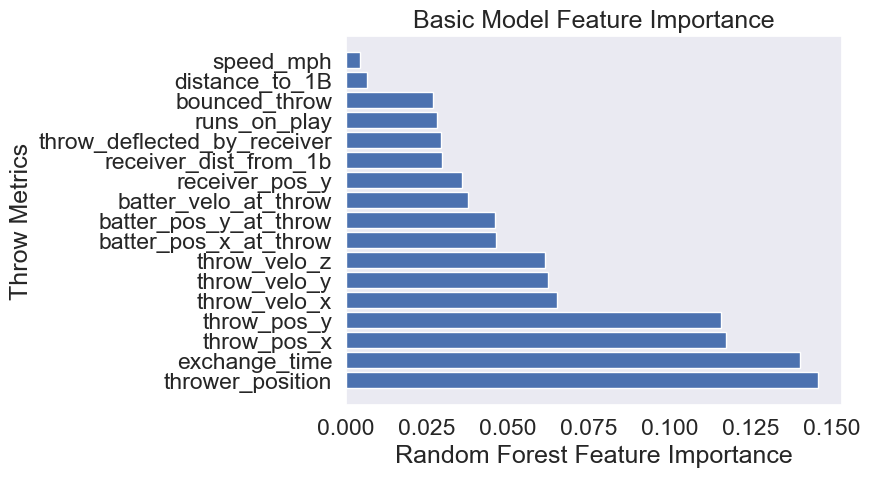

In [51]:
plt.barh(x_train.columns, importances[sorted_indices])
plt.xlabel("Random Forest Feature Importance")
plt.title('Basic Model Feature Importance')
plt.ylabel('Throw Metrics')
plt.grid(False)
plt.show()

I then created predictive scores to determine the error socre, accuracy score and the area under the curve (AUC) score. These are two ways to determine how well the model performed. Looks like the model did pretty well learning with a low error score and high accuracy and AUC scores. I then plotted the AUC score in a Receiver Operating Characteristic (ROC) graph. The ROC graph has one vertices and goes to the top left. This shows the model learned but essentially only used those four variables it seems. Some tuning will be needed.

In [52]:
pred = model.predict(x_test)
prob = model.predict_proba(x_test)
pred
prob

array([[0.73, 0.27],
       [0.01, 0.99],
       [0.01, 0.99],
       ...,
       [0.28, 0.72],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [53]:
base_model_error = 1 - accuracy_score(y_test, pred)
base_model_error

0.030281439258995402

In [54]:
acc_score = accuracy_score(y_test, pred)
acc_score

0.9697185607410046

In [55]:
auc1 = roc_auc_score(y_test, pred)
auc1

0.8676369105547199

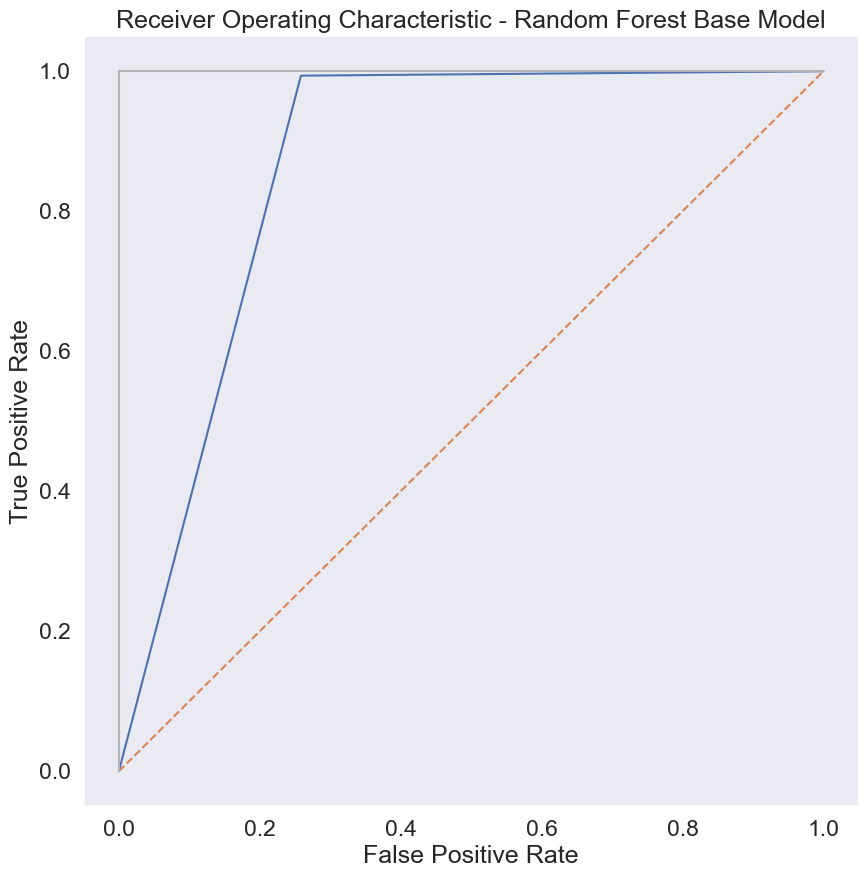

In [56]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest Base Model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.grid(False)
plt.show()

The below code generates what the best parameters would be for the Random Forest Classifier model. The accuracy score has increased from the cross validation score a bit so the hyperparameter tuning will improved the model.

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)

y_pred_test = best_rf_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {test_accuracy}")

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9672247951549697


I use the parameter results from above and create a new model. I then fit the model on the training data and generate predictive scores. I use the probability scores and turn them into a data frame for use later.

In [58]:
model_1 = RandomForestClassifier(bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [59]:
model_1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [60]:
pred = model_1.predict(x_test)
prob = model_1.predict_proba(x_test)
pred
prob

array([[0.76 , 0.24 ],
       [0.   , 1.   ],
       [0.005, 0.995],
       ...,
       [0.465, 0.535],
       [0.   , 1.   ],
       [0.   , 1.   ]])

In [61]:
prob_model = pd.DataFrame(prob, columns = ['Prob_0', 'Prob_1'])

Below are some checks to see if the model worked well to predict if the outcome of 'out'. Both code block 62 and 63 total the number of times the outcome was an out (1) for the test column and 'Prob_1' from the probability scores. They are similar which is a good sign along with the accuracy score and auc scores being better. Therefore, the tuning worked and improving the model.

In [62]:
y_test.sum()

2540.0

In [63]:
prob_model['Prob_1'].sum()

2544.0550000000003

In [64]:
acc_score = accuracy_score(y_test, pred)
acc_score

0.970074812967581

In [65]:
auc1 = roc_auc_score(y_test, prob_model['Prob_1'])
auc1

0.9831947270636114

Below is the ROC graph from the Tuned Model. This model has a strong curve to the top left. This is much better than the base model.

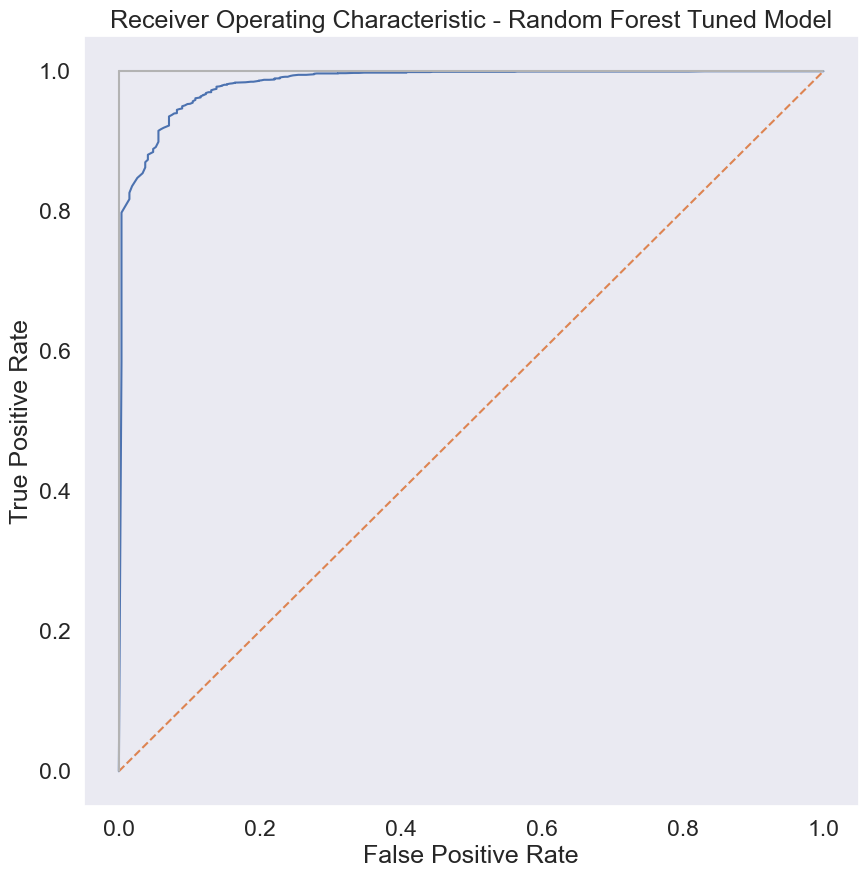

In [66]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, prob_model['Prob_1'])

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest Tuned Model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.grid(False)
plt.show()

Below is the Feature Importance chart from the tuned model. It seems as the most important factors to determine how well fielders throw are their exchange time and where they are on the field. The closer they are to first base and the quicker their exchange time is, the higher probability the throw will be on target.

In [67]:
importances = model_1.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

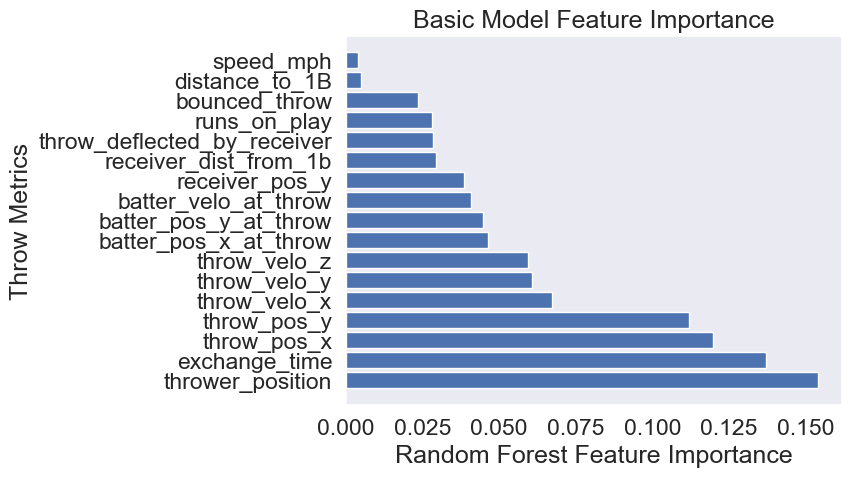

In [68]:
plt.barh(x_train.columns, importances[sorted_indices])
plt.xlabel("Random Forest Feature Importance")
plt.title('Basic Model Feature Importance')
plt.ylabel('Throw Metrics')
plt.grid(False)
plt.show()

In [69]:
Features.head(10)

thrower_position  exchange_time  throw_pos_x  throw_pos_y  \
10951                 4          0.733    53.056457   187.984784   
17676                 4          0.666    42.826112   182.114806   
11597                 6          0.734    64.948196   181.729572   
14906                 4          1.000    40.962718   181.575974   
14034                 6          0.767    50.878956   181.570805   
16133                 4          0.633    63.356768   179.176170   
16747                 4          0.900    40.492494   178.432099   
12076                 4          0.734    51.446356   176.365312   
18024                 4          0.767    32.346571   174.976343   
14999                 4          1.000    34.207993   174.595811   

       throw_velo_x  throw_velo_y  throw_velo_z  batter_pos_x_at_throw  \
10951     13.050047    -59.974368     11.814407              32.560147   
17676     14.402262    -75.283777      5.421098              36.753085   
11597      1.763758    -78.287662      7.114885              39.159793   
14906     11.820008    -58.570848     10.621978              25.354392   
14034      5.222105    -58.653193      9.253620              31.649026   
16133      1.377823    -76.620207     11.098772              36.355106   
16747     18.641271    -70.523570      6.215059              30.626532   
12076     10.763395    -60.083890     10.107955              36.184954   
18024     18.948675    -62.168302      9.309228              43.152325   
14999     19.356252    -65.042706     -0.387909              30.820377   

       batter_pos_y_at_throw  batter_velo_at_throw  receiver_pos_y  \
10951              32.758630             23.232512       65.796056   
17676              37.826522             27.092771       67.201313   
11597              39.623088             29.096419       66.328579   
14906              28.313887             25.303047       65.960367   
14034              31.052163             27.490715       64.505042   
16133              36.416242             28.500845       64.765311   
16747              27.816588             19.600263       66.328221   
12076              33.790526             26.208468       66.975387   
18024              41.326622             28.829739       67.514199   
14999              35.041013             25.582830       65.317235   

       receiver_dist_from_1b  throw_deflected_by_receiver  runs_on_play  \
10951               6.737666                            1             0   
17676               3.603813                            1             0   
11597               2.726041                            0             0   
14906               4.513594                            0             0   
14034               4.803926                            0             0   
16133               2.769978                            0             0   
16747               2.755573                            0             0   
12076               3.345534                            0             0   
18024               3.946930                            0             0   
14999               3.408499                            0             0   

       bounced_throw  distance_to_1B  speed_mph  
10951              0      123.361032  41.848457  
17676              1      116.686537  52.260682  
11597              0      115.404201  53.391482  
14906              0      117.135052  40.739734  
14034              1      117.341209  40.148993  
16133              0      114.432942  52.249482  
16747              1      114.348070  49.735672  
12076              0      110.095971  41.618410  
18024              1      111.717746  44.312663  
14999              1      112.437450  46.269367

I then used the tuned model to predict onto the entire data frame and obtained scores for every throw. 

In [70]:
Features = data.drop(['batter_result_first'
                   ,'batter_result_second'
                   ,'throw_id'
                   ,'team_id'
                   ,'fielder_id'
                   ,'receiver_id'
                   ,'thrower_id'
                   ,'fielder_position'
                   ,'receiver_pos_x'
                   ,'batter_result_out'], axis=1)

In [71]:
pred = model_1.predict(Features)
prob = model_1.predict_proba(Features)
pred
prob

array([[0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

Below are some checks on the data to see if everything worked well. Everything seems to work well so I merged the probability score, the dependent variable and the independent variables together to create the final data set.

In [72]:
Target.sum()

12702.0

In [73]:
prob_deploy = pd.DataFrame(prob, columns = ['Prob_0', 'Prob_1'])

In [74]:
prob_deploy['Prob_1'].sum()

12706.055

In [75]:
print(len(prob_deploy))
print(len(Target))
print(len(Features))

14035
14035
14035


In [76]:
prob_deploy.isna().sum()

Prob_0    0
Prob_1    0
dtype: int64

In [77]:
Features

thrower_position  exchange_time  throw_pos_x  throw_pos_y  \
10951                 4          0.733    53.056457   187.984784   
17676                 4          0.666    42.826112   182.114806   
11597                 6          0.734    64.948196   181.729572   
14906                 4          1.000    40.962718   181.575974   
14034                 6          0.767    50.878956   181.570805   
...                 ...            ...          ...          ...   
16341                 5          0.767   -18.951507    30.784961   
13939                 5          0.567   -22.048931    29.794816   
6015                  5          0.734    -4.444144    28.800199   
18329                 5          0.434    -7.832513    28.798849   
2099                  5          0.500   -14.797592    27.117123   

       throw_velo_x  throw_velo_y  throw_velo_z  batter_pos_x_at_throw  \
10951     13.050047    -59.974368     11.814407              32.560147   
17676     14.402262    -75.283777      5.421098              36.753085   
11597      1.763758    -78.287662      7.114885              39.159793   
14906     11.820008    -58.570848     10.621978              25.354392   
14034      5.222105    -58.653193      9.253620              31.649026   
...             ...           ...           ...                    ...   
16341     62.540749     26.639679      5.359556              36.368172   
13939     58.129708     28.249977      7.519473              33.492408   
6015      57.093302     35.508388      7.063452              37.801369   
18329     60.146459     35.165871      6.166384              41.012215   
2099      62.836684     33.918517      6.951708              38.692853   

       batter_pos_y_at_throw  batter_velo_at_throw  receiver_pos_y  \
10951              32.758630             23.232512       65.796056   
17676              37.826522             27.092771       67.201313   
11597              39.623088             29.096419       66.328579   
14906              28.313887             25.303047       65.960367   
14034              31.052163             27.490715       64.505042   
...                      ...                   ...             ...   
16341              37.823031             25.173281       65.454043   
13939              35.025439             27.491477       65.577217   
6015               40.000578             29.321458       65.957075   
18329              42.580872             30.659285       63.166741   
2099               38.531133             30.518328       65.441891   

       receiver_dist_from_1b  throw_deflected_by_receiver  runs_on_play  \
10951               6.737666                            1             0   
17676               3.603813                            1             0   
11597               2.726041                            0             0   
14906               4.513594                            0             0   
14034               4.803926                            0             0   
...                      ...                          ...           ...   
16341               2.941427                            0             0   
13939               2.835874                            0             0   
6015                3.969172                            0             0   
18329               3.913818                            0             0   
2099                4.238704                            0             0   

       bounced_throw  distance_to_1B  speed_mph  
10951              0      123.361032  41.848457  
17676              1      116.686537  52.260682  
11597              0      115.404201  53.391482  
14906              0      117.135052  40.739734  
14034              1      117.341209  40.148993  
...              ...             ...        ...  
16341              0       87.442434  46.348671  
13939              0       90.952302  44.066358  
6015               0       74.750466  45.841757  
18329              0       75.823159  47.503856  
2099     

In [78]:
final_df = pd.merge(Target, Features, left_index=True, right_index=True, how='left')
final_df.head(30)

batter_result_out  thrower_position  exchange_time  throw_pos_x  \
10951                0.0                 4          0.733    53.056457   
17676                0.0                 4          0.666    42.826112   
11597                0.0                 6          0.734    64.948196   
14906                1.0                 4          1.000    40.962718   
14034                0.0                 6          0.767    50.878956   
16133                1.0                 4          0.633    63.356768   
16747                1.0                 4          0.900    40.492494   
12076                1.0                 4          0.734    51.446356   
18024                0.0                 4          0.767    32.346571   
14999                1.0                 4          1.000    34.207993   
11975                1.0                 4          0.933    61.334469   
14045                1.0                 4          0.733    60.601618   
19750                1.0                 4          0.700    59.522307   
15228                0.0                 6          0.900    -3.644608   
11357                1.0                 6          1.567    -2.271777   
16263                1.0                 4          0.900    30.581247   
12192                1.0                 6          0.700    43.927751   
14905                1.0                 4          0.966    55.810559   
3725                 0.0                 4          0.867    22.236054   
17499                0.0                 4          1.067    -8.923166   
17821                1.0                 4          1.167    52.306729   
2072                 0.0                 6          0.667    -8.150528   
13831                1.0                 4          1.000    14.302019   
13739                0.0                 4          1.333   -19.105863   
10912                0.0                 6          0.500   -14.492487   
15110                1.0                 6          0.600   -10.612596   
13475                1.0                 6          1.467    48.370167   
13540                1.0                 4          0.800    -0.165258   
10691                1.0                 6          0.667   -32.065164   
19776                0.0                 6          0.900     5.698653   

       throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951   187.984784     13.050047    -59.974368     11.814407   
17676   182.114806     14.402262    -75.283777      5.421098   
11597   181.729572      1.763758    -78.287662      7.114885   
14906   181.575974     11.820008    -58.570848     10.621978   
14034   181.570805      5.222105    -58.653193      9.253620   
16133   179.176170      1.377823    -76.620207     11.098772   
16747   178.432099     18.641271    -70.523570      6.215059   
12076   176.365312     10.763395    -60.083890     10.107955   
18024   174.976343     18.948675    -62.168302      9.309228   
14999   174.595811     19.356252    -65.042706     -0.387909   
11975   174.332330      2.953683    -66.912496     11.092659   
14045   174.104369      0.800628    -66.661551      3.552126   
19750   173.953921      3.621058    -75.048528      7.147791   
15228   173.734763     37.637097    -49.961509      1.531584   
11357   173.424249     37.770113    -62.388016     13.061687   
16263   171.662634     21.666478    -67.396012     10.578474   
12192   171.225636     16.257180    -74.886483      4.965813   
14905   170.618710      4.915105    -63.893776     11.768831   
3725    170.449460     23.667079    -56.421075     10.055449   
17499   170.109681     44.734806    -55.561600      3.823952   
17821   168.755540      7.774177    -72.278406      8.544083   
2072    167.841333     41.225761    -61.162316      3.280250   
13831   167.558075     31.178254    -58.630076     10.283182   
13739   167.447545     42.957031    -54.838319      7.989389   
10912   167.350765     47.105208    -47.622437     15.082951   
15110   167.249187     37.740037    -51.978378  

In [79]:
print(final_df.index.unique())

print(prob_deploy['Prob_1'].index.unique())


Int64Index([10951, 17676, 11597, 14906, 14034, 16133, 16747, 12076, 18024,
            14999,
            ...
            10127,     6, 10564,   705, 14258, 16341, 13939,  6015, 18329,
             2099],
           dtype='int64', length=14035)
RangeIndex(start=0, stop=14035, step=1)


In [80]:
prob_deploy_df = pd.DataFrame({'Prob_1': prob_deploy['Prob_1']})
prob_deploy_df = prob_deploy_df.set_index(final_df.index)

final_df = pd.merge(final_df, prob_deploy_df, left_index=True, right_index=True, how='left')

In [81]:
final_df

batter_result_out  thrower_position  exchange_time  throw_pos_x  \
10951                0.0                 4          0.733    53.056457   
17676                0.0                 4          0.666    42.826112   
11597                0.0                 6          0.734    64.948196   
14906                1.0                 4          1.000    40.962718   
14034                0.0                 6          0.767    50.878956   
...                  ...               ...            ...          ...   
16341                1.0                 5          0.767   -18.951507   
13939                1.0                 5          0.567   -22.048931   
6015                 1.0                 5          0.734    -4.444144   
18329                1.0                 5          0.434    -7.832513   
2099                 1.0                 5          0.500   -14.797592   

       throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951   187.984784     13.050047    -59.974368     11.814407   
17676   182.114806     14.402262    -75.283777      5.421098   
11597   181.729572      1.763758    -78.287662      7.114885   
14906   181.575974     11.820008    -58.570848     10.621978   
14034   181.570805      5.222105    -58.653193      9.253620   
...            ...           ...           ...           ...   
16341    30.784961     62.540749     26.639679      5.359556   
13939    29.794816     58.129708     28.249977      7.519473   
6015     28.800199     57.093302     35.508388      7.063452   
18329    28.798849     60.146459     35.165871      6.166384   
2099     27.117123     62.836684     33.918517      6.951708   

       batter_pos_x_at_throw  batter_pos_y_at_throw  batter_velo_at_throw  \
10951              32.560147              32.758630             23.232512   
17676              36.753085              37.826522             27.092771   
11597              39.159793              39.623088             29.096419   
14906              25.354392              28.313887             25.303047   
14034              31.649026              31.052163             27.490715   
...                      ...                    ...                   ...   
16341              36.368172              37.823031             25.173281   
13939              33.492408              35.025439             27.491477   
6015               37.801369              40.000578             29.321458   
18329              41.012215              42.580872             30.659285   
2099               38.692853              38.531133             30.518328   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
10951       65.796056               6.737666                            1   
17676       67.201313               3.603813                            1   
11597       66.328579               2.726041                            0   
14906       65.960367               4.513594                            0   
14034       64.505042               4.803926                            0   
...               ...                    ...                          ...   
16341       65.454043               2.941427                            0   
13939       65.577217               2.835874                            0   
6015        65.957075               3.969172                            0   
18329       63.166741               3.913818                            0   
2099        65.441891               4.238704                            0   

       runs_on_play  bounced_throw  distance_to_1B  speed_mph  Prob_1  
10951             0              0      123.361032  41.848457    0.12  
17676             0              1      116.686537  52.260682    0.00  
11597             0              0      115.404201  53.391482    0.00  
14906             0              0      117.135052  40.739734    1.00  
14034             0              1      117.341209  40.148993    0.00  
...             ...            ...             ...        ...     .

In [82]:
final_df.isna().sum()

batter_result_out              0
thrower_position               0
exchange_time                  0
throw_pos_x                    0
throw_pos_y                    0
throw_velo_x                   0
throw_velo_y                   0
throw_velo_z                   0
batter_pos_x_at_throw          0
batter_pos_y_at_throw          0
batter_velo_at_throw           0
receiver_pos_y                 0
receiver_dist_from_1b          0
throw_deflected_by_receiver    0
runs_on_play                   0
bounced_throw                  0
distance_to_1B                 0
speed_mph                      0
Prob_1                         0
dtype: int64

To create the evaluation statistic, I used the saem logic as Outs Above Average (OAA) to create Throws Above Average (TAA) to determine infielders' production in comparison to league average.

In [83]:
final_df['Infield_outs_difference'] = final_df['batter_result_out'] - final_df['Prob_1']
final_df

batter_result_out  thrower_position  exchange_time  throw_pos_x  \
10951                0.0                 4          0.733    53.056457   
17676                0.0                 4          0.666    42.826112   
11597                0.0                 6          0.734    64.948196   
14906                1.0                 4          1.000    40.962718   
14034                0.0                 6          0.767    50.878956   
...                  ...               ...            ...          ...   
16341                1.0                 5          0.767   -18.951507   
13939                1.0                 5          0.567   -22.048931   
6015                 1.0                 5          0.734    -4.444144   
18329                1.0                 5          0.434    -7.832513   
2099                 1.0                 5          0.500   -14.797592   

       throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951   187.984784     13.050047    -59.974368     11.814407   
17676   182.114806     14.402262    -75.283777      5.421098   
11597   181.729572      1.763758    -78.287662      7.114885   
14906   181.575974     11.820008    -58.570848     10.621978   
14034   181.570805      5.222105    -58.653193      9.253620   
...            ...           ...           ...           ...   
16341    30.784961     62.540749     26.639679      5.359556   
13939    29.794816     58.129708     28.249977      7.519473   
6015     28.800199     57.093302     35.508388      7.063452   
18329    28.798849     60.146459     35.165871      6.166384   
2099     27.117123     62.836684     33.918517      6.951708   

       batter_pos_x_at_throw  batter_pos_y_at_throw  batter_velo_at_throw  \
10951              32.560147              32.758630             23.232512   
17676              36.753085              37.826522             27.092771   
11597              39.159793              39.623088             29.096419   
14906              25.354392              28.313887             25.303047   
14034              31.649026              31.052163             27.490715   
...                      ...                    ...                   ...   
16341              36.368172              37.823031             25.173281   
13939              33.492408              35.025439             27.491477   
6015               37.801369              40.000578             29.321458   
18329              41.012215              42.580872             30.659285   
2099               38.692853              38.531133             30.518328   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
10951       65.796056               6.737666                            1   
17676       67.201313               3.603813                            1   
11597       66.328579               2.726041                            0   
14906       65.960367               4.513594                            0   
14034       64.505042               4.803926                            0   
...               ...                    ...                          ...   
16341       65.454043               2.941427                            0   
13939       65.577217               2.835874                            0   
6015        65.957075               3.969172                            0   
18329       63.166741               3.913818                            0   
2099        65.441891               4.238704                            0   

       runs_on_play  bounced_throw  distance_to_1B  speed_mph  Prob_1  \
10951             0              0      123.361032  41.848457    0.12   
17676             0              1      116.686537  52.260682    0.00   
11597             0              0      115.404201  53.391482    0.00   
14906             0              0      117.135052  40.739734    1.00   
14034             0              1      117.341209  40.148993    0.00   
...             ...            ...             ...        ...

In [84]:
final_df['thrower_id'] = final_df.index.map(data['thrower_id'])
final_df

batter_result_out  thrower_position  exchange_time  throw_pos_x  \
10951                0.0                 4          0.733    53.056457   
17676                0.0                 4          0.666    42.826112   
11597                0.0                 6          0.734    64.948196   
14906                1.0                 4          1.000    40.962718   
14034                0.0                 6          0.767    50.878956   
...                  ...               ...            ...          ...   
16341                1.0                 5          0.767   -18.951507   
13939                1.0                 5          0.567   -22.048931   
6015                 1.0                 5          0.734    -4.444144   
18329                1.0                 5          0.434    -7.832513   
2099                 1.0                 5          0.500   -14.797592   

       throw_pos_y  throw_velo_x  throw_velo_y  throw_velo_z  \
10951   187.984784     13.050047    -59.974368     11.814407   
17676   182.114806     14.402262    -75.283777      5.421098   
11597   181.729572      1.763758    -78.287662      7.114885   
14906   181.575974     11.820008    -58.570848     10.621978   
14034   181.570805      5.222105    -58.653193      9.253620   
...            ...           ...           ...           ...   
16341    30.784961     62.540749     26.639679      5.359556   
13939    29.794816     58.129708     28.249977      7.519473   
6015     28.800199     57.093302     35.508388      7.063452   
18329    28.798849     60.146459     35.165871      6.166384   
2099     27.117123     62.836684     33.918517      6.951708   

       batter_pos_x_at_throw  batter_pos_y_at_throw  batter_velo_at_throw  \
10951              32.560147              32.758630             23.232512   
17676              36.753085              37.826522             27.092771   
11597              39.159793              39.623088             29.096419   
14906              25.354392              28.313887             25.303047   
14034              31.649026              31.052163             27.490715   
...                      ...                    ...                   ...   
16341              36.368172              37.823031             25.173281   
13939              33.492408              35.025439             27.491477   
6015               37.801369              40.000578             29.321458   
18329              41.012215              42.580872             30.659285   
2099               38.692853              38.531133             30.518328   

       receiver_pos_y  receiver_dist_from_1b  throw_deflected_by_receiver  \
10951       65.796056               6.737666                            1   
17676       67.201313               3.603813                            1   
11597       66.328579               2.726041                            0   
14906       65.960367               4.513594                            0   
14034       64.505042               4.803926                            0   
...               ...                    ...                          ...   
16341       65.454043               2.941427                            0   
13939       65.577217               2.835874                            0   
6015        65.957075               3.969172                            0   
18329       63.166741               3.913818                            0   
2099        65.441891               4.238704                            0   

       runs_on_play  bounced_throw  distance_to_1B  speed_mph  Prob_1  \
10951             0              0      123.361032  41.848457    0.12   
17676             0              1      116.686537  52.260682    0.00   
11597             0              0      115.404201  53.391482    0.00   
14906             0              0      117.135052  40.739734    1.00   
14034             0              1      117.341209  40.148993    0.00   
...             ...            ...             ...        ...

In [85]:
difference_by_thrower = final_df.groupby('thrower_id')['Infield_outs_difference'].sum().reset_index()
difference_by_thrower

thrower_id  Infield_outs_difference
0            13                   -0.820
1            14                    0.000
2            16                    0.075
3            21                    0.000
4            26                    0.055
..          ...                      ...
171         822                    0.000
172         828                    0.210
173         833                    0.355
174         836                    0.000
175         841                    0.000

[176 rows x 2 columns]

In [86]:
average_difference = difference_by_thrower['Infield_outs_difference'].mean()
average_difference

-0.023039772727272714

In [87]:
difference_by_thrower['Throws_Above_Average'] = difference_by_thrower['Infield_outs_difference'] - average_difference
difference_by_thrower = difference_by_thrower.sort_values(by='Throws_Above_Average', ascending=False)
difference_by_thrower

thrower_id  Infield_outs_difference  Throws_Above_Average
53          300                    1.820               1.84304
168         813                    1.740               1.76304
51          290                    1.545               1.56804
153         753                    1.160               1.18304
37          188                    1.140               1.16304
..          ...                      ...                   ...
44          241                   -1.865              -1.84196
45          246                   -1.920              -1.89696
94          507                   -1.935              -1.91196
31          162                   -2.020              -1.99696
127         673                   -2.135              -2.11196

[176 rows x 3 columns]

In [88]:
difference_by_thrower.to_csv(r'C:\Users\cboat\OneDrive\Documents\Royals Analyst\Throws_Above_Average.csv')

## Conclusion

The best throwers where the ones who exchanged the ball the quickest and were able to make the throw as short as possible before releasing the ball. The data set didn't contain how fast the runner is or how hard the ball was hit. Both of these can play a factor into the outcome of the throw. The quicker a runner can run to first base, the more pressure it pputs on the infielders to make their exchange times better and the harder they'd have to throw the ball. Also, if the ball is hit hard right at them, they'd have more time to make the throw versus if the ball was a slow roller. Usually, the more time a player has to set up properly before making the throw, the better the throw would be. Both the speed of the runner and the exit velocity of the ground ball would play a factor into this calculation.